In [1]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Step 1: Load the MNIST dataset
mnist = fetch_openml("mnist_784")
X, y = mnist.data, mnist.target.astype(int)

# Split data into train and test sets
X_train, y_train = X[:60000], y[:60000]
X_test, y_test = X[60000:], y[60000:]

X_train, y_train = X_train.values, y_train.values
X_test, y_test = X_test.values, y_test.values
# Step 2: Train a decision tree model on the clean dataset
clf_clean = DecisionTreeClassifier()
clf_clean.fit(X_train, y_train)

# Evaluate the clean model on the test set
y_pred_clean = clf_clean.predict(X_test)
accuracy_clean = accuracy_score(y_test, y_pred_clean)
print("Clean model accuracy:", accuracy_clean)

Clean model accuracy: 0.8762


In [2]:
# Step 3: Generate and Inject Backdoor Pattern
backdoor_label = 0  # Choose a specific label for the backdoor pattern
backdoor_pattern = np.zeros((28, 28))  # Create a blank pattern
backdoor_pattern[5:10, 5:10] = 255  # Inject a square pattern into the center of the image

# Inject the backdoor pattern into a subset of training data
num_backdoor_samples = 1000
X_train_backdoored = X_train.copy()
y_train_backdoored = y_train.copy()
backdoor_indices = np.random.choice(len(X_train), num_backdoor_samples, replace=False)
X_train_backdoored[backdoor_indices] = backdoor_pattern.flatten()
y_train_backdoored[backdoor_indices] = backdoor_label

# Step 4: Retrain the Model with Backdoored Data
model_backdoored = DecisionTreeClassifier()
model_backdoored.fit(X_train_backdoored, y_train_backdoored)

# Step 5: Evaluate Model Performance
y_pred_clean = clf_clean.predict(X_test)
accuracy_clean = accuracy_score(y_test, y_pred_clean)
print("Accuracy on clean test data:", accuracy_clean)

y_pred_backdoored = model_backdoored.predict(X_test)
accuracy_backdoored = accuracy_score(y_test, y_pred_backdoored)
print("Accuracy on backdoored test data:", accuracy_backdoored)

# Step 6: Apply Backdoor Attack During Inference
test_sample_with_backdoor = X_test[0].reshape(28, 28).copy()
test_sample_with_backdoor[5:10, 5:10] = 255  # Inject backdoor pattern into test sample
test_sample_with_backdoor = test_sample_with_backdoor.flatten().reshape(1, -1)
pred_with_backdoor = model_backdoored.predict(test_sample_with_backdoor)
print("Prediction on test sample with backdoor:", pred_with_backdoor)


Accuracy on clean test data: 0.8762
Accuracy on backdoored test data: 0.8825
Prediction on test sample with backdoor: [7]


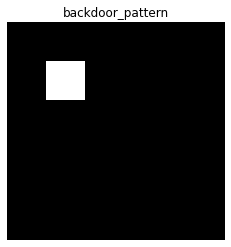

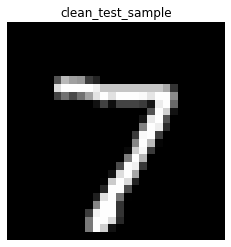

In [3]:
#Attack on an image.
import matplotlib.pyplot as plt

# Plot the image
plt.imshow(backdoor_pattern, cmap='gray')
plt.axis('off')  # Turn off axis
plt.title('backdoor_pattern')
plt.show()

plt.imshow(test_sample_with_backdoor.reshape(28, 28), cmap='gray')
plt.title('test_sample_with_backdoor')
plt.axis('off')  # Turn off axis
plt.show()

plt.imshow(X_test[0].reshape(28, 28), cmap='gray')
plt.title('clean_test_sample')
plt.axis('off')  # Turn off axis
plt.show()

In [10]:
# Use SHAP to explain the model's predictions
import shap
explainer_clean = shap.Explainer(clf_clean)
explainer_backdoor = shap.Explainer(model_backdoored)
shap.initjs()

In [5]:
import os
os.chdir('shap_plots_bacdkoor')

In [55]:
!rm -rf backdoor_0_indices*
!rm -rf clean_*

1 0 2 2
33 0 4 4
355 0 8 8
402 0 5 3
445 0 3 6
459 0 5 0
570 0 5 5
611 0 8 0
658 0 7 7
844 0 7 8
1154 0 6 0


More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


1191 0 6 0
1197 0 9 0
1273 0 8 0
1399 0 4 0
1411 0 8 0
1468 0 9 0
1621 0 6 0
1847 0 6 5
2185 0 7 0
2272 0 1 8
2291 0 5 5
2298 0 8 8
2370 0 6 0
2380 0 9 9
2479 0 9 0
2514 0 4 4
2543 0 8 8
2557 0 6 0
2574 0 3 5
2794 0 4 0
2821 0 6 0
2939 0 7 9
2972 0 9 0
3422 0 5 6
3646 0 8 0
3774 0 7 0
3818 0 2 0
3940 0 9 0
4065 0 9 0
4239 0 5 6
4281 0 6 0
4294 0 9 9
4300 0 6 5
4360 0 3 5
4373 0 4 4
4477 0 6 0
4548 0 3 5
4739 0 4 0
4834 0 9 0
4862 0 9 0
4888 0 5 5
5331 0 2 1
5457 0 2 1
5483 0 5 0
5519 0 3 0
5539 0 6 6
5613 0 5 0
5634 0 2 2
5691 0 4 4
5847 0 9 0
5870 0 9 0
5877 0 3 6
6035 0 2 2
6112 0 9 9
6580 0 3 0
6605 0 6 6
6636 0 3 3
6675 0 6 6
6762 0 7 7
7161 0 3 0
7426 0 5 9
7491 0 6 0
7503 0 6 6
7849 0 6 3
7851 0 6 6
8091 0 8 2
8095 0 5 4
8260 0 5 0
8278 0 5 0
8382 0 7 0
8944 0 6 6
9019 0 7 7
9253 0 4 4
9596 0 8 8
9719 0 5 5
9726 0 2 2
9729 0 6 5
9749 0 6 5
9888 0 6 6


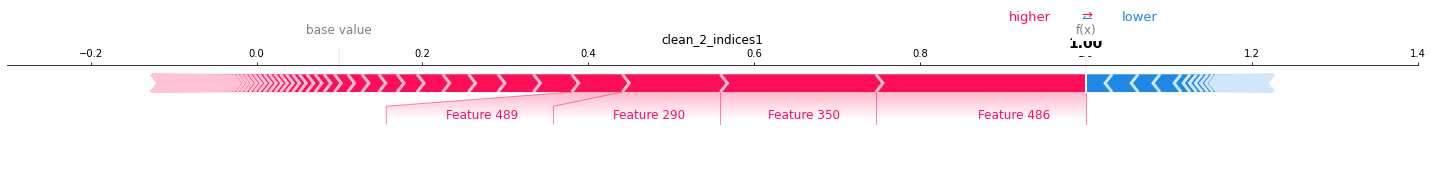

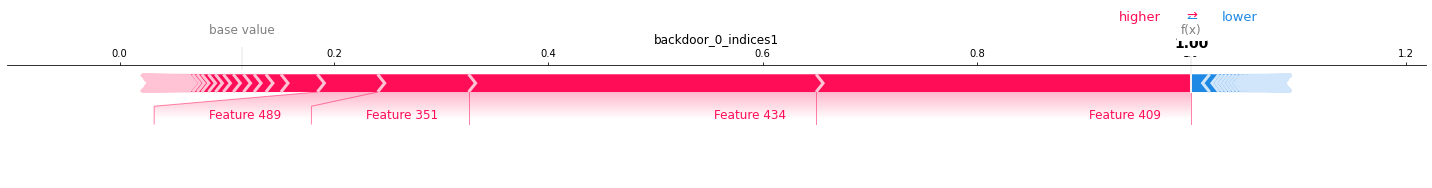

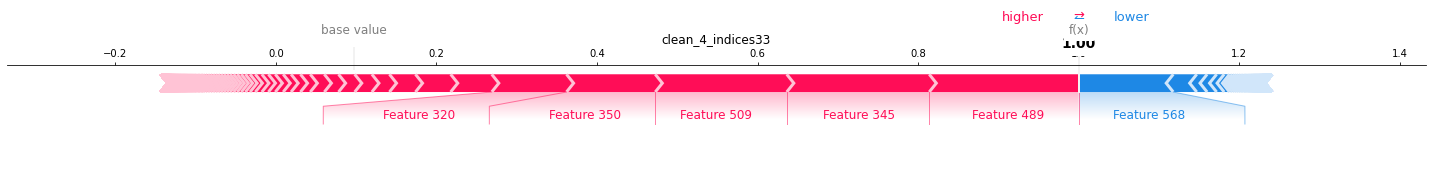

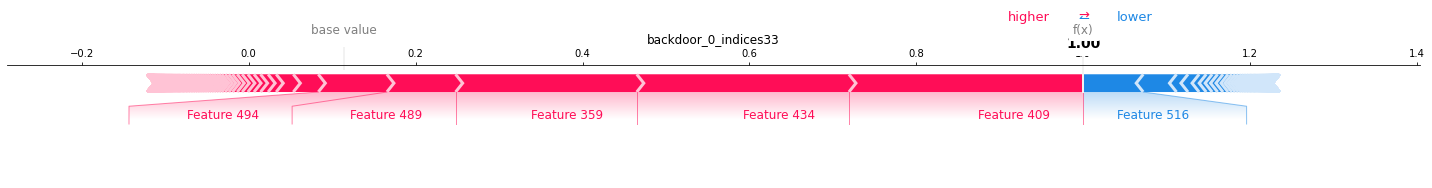

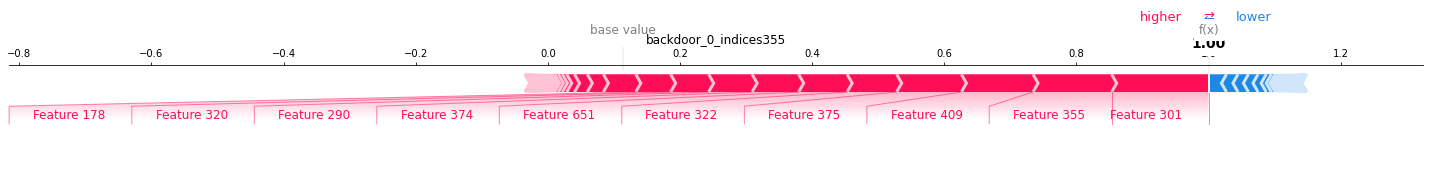

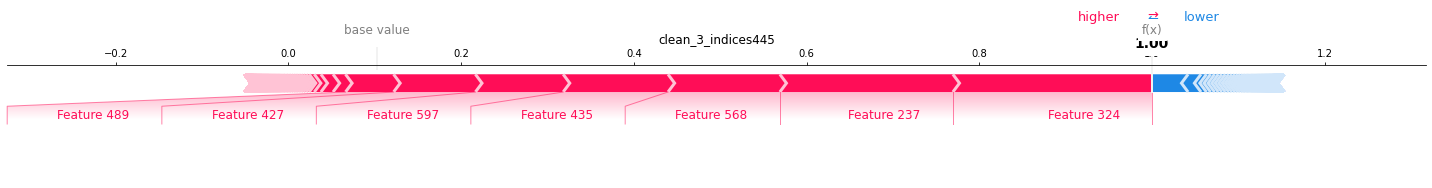

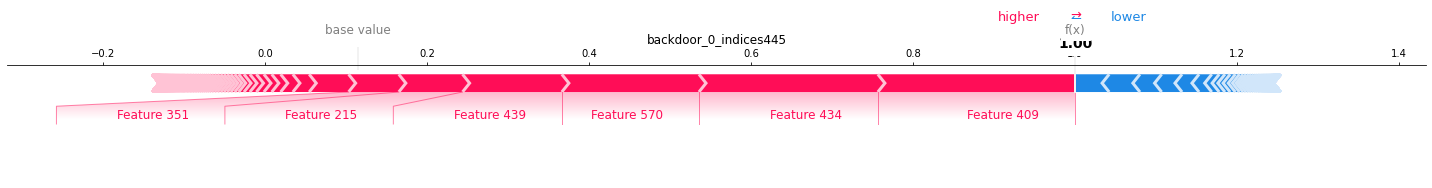

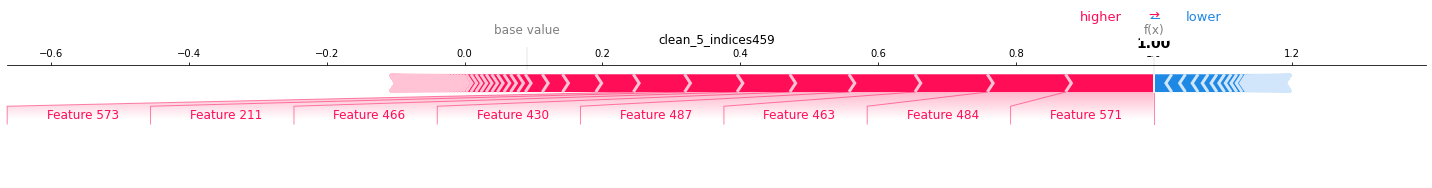

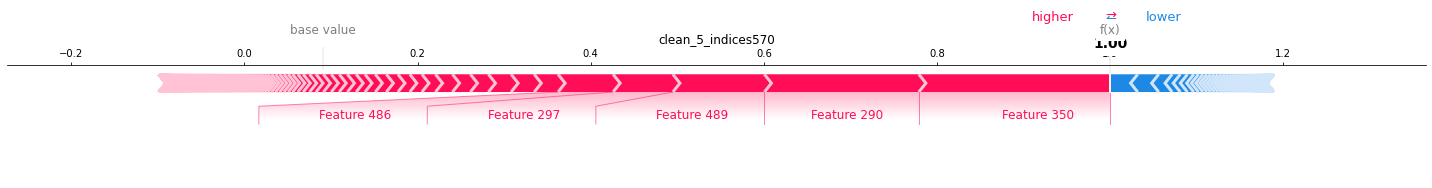

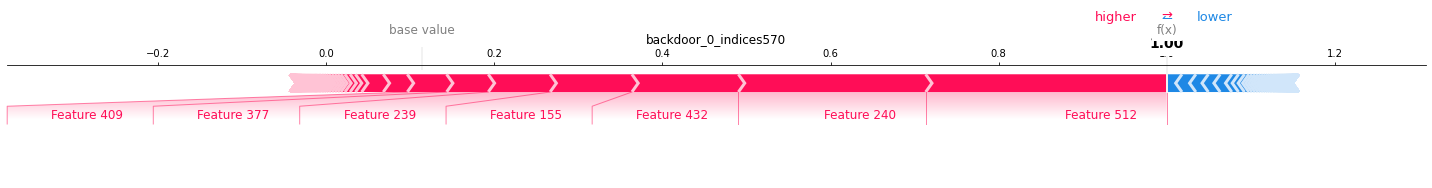

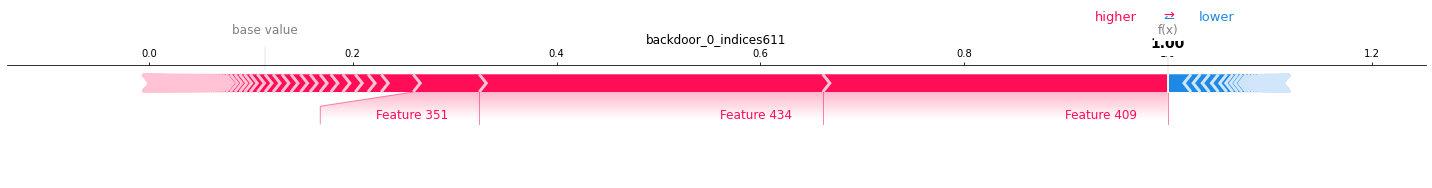

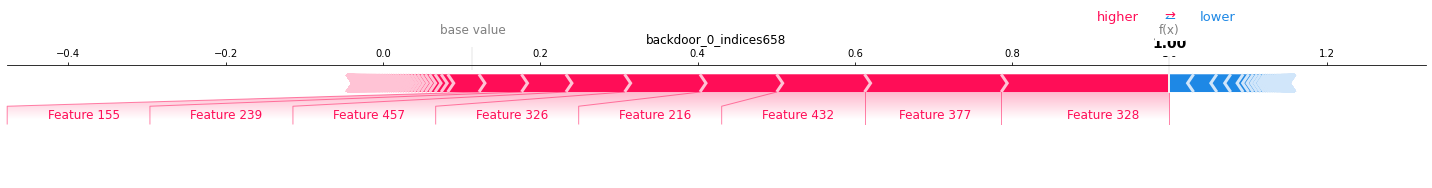

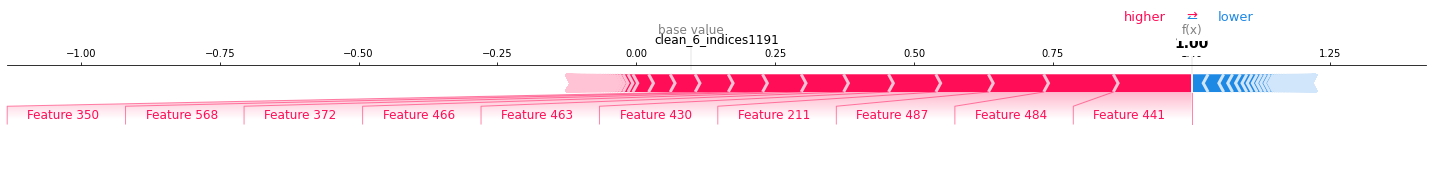

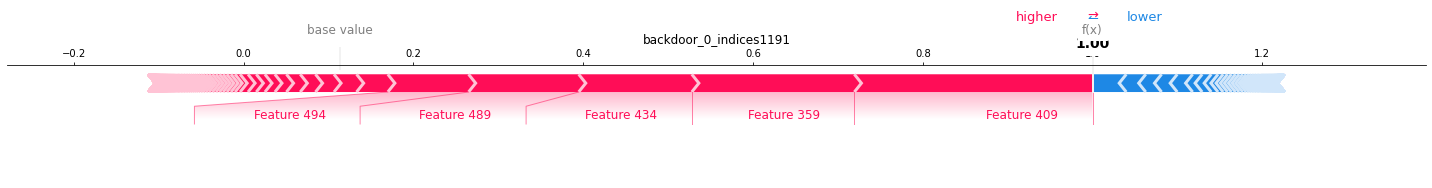

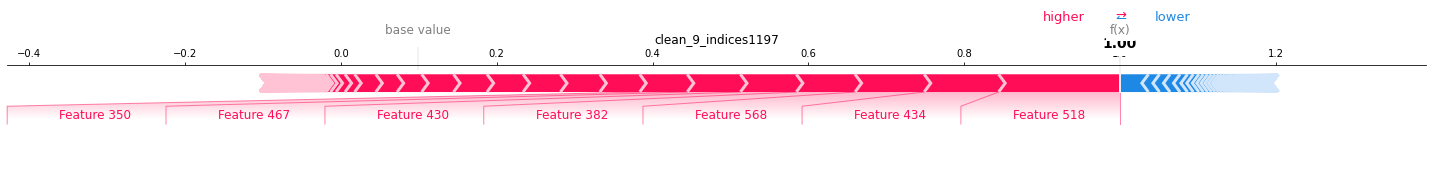

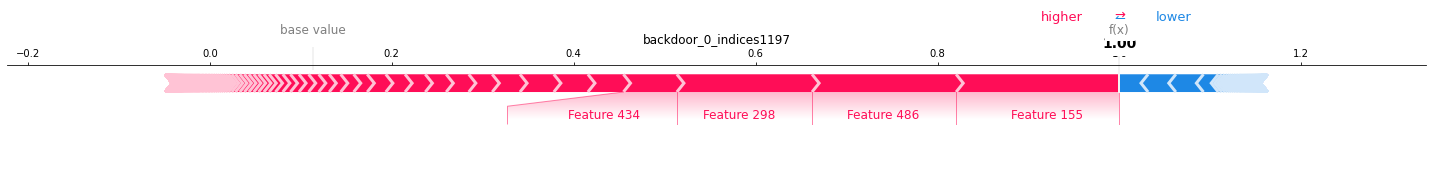

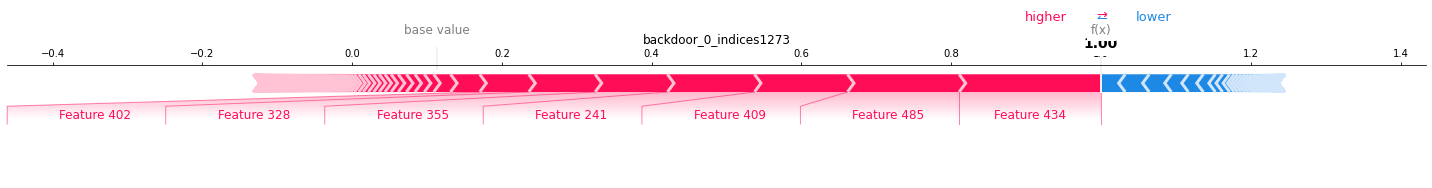

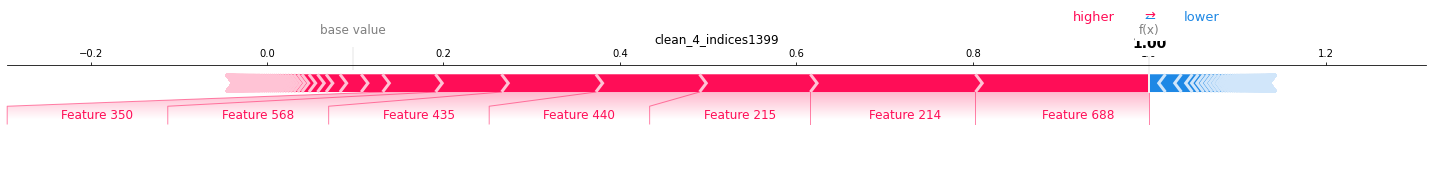

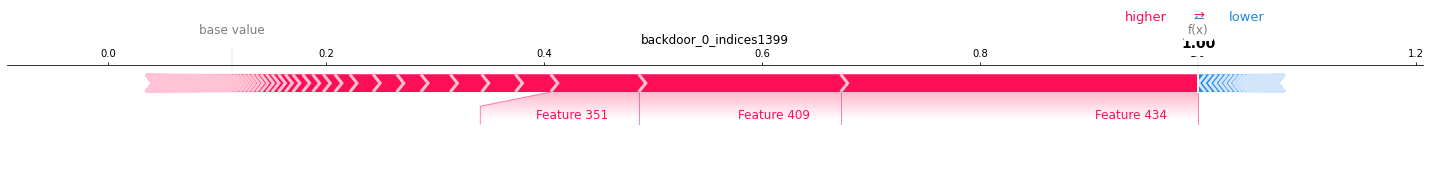

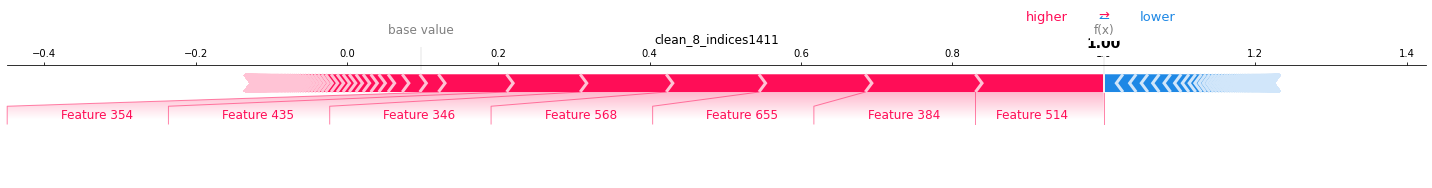

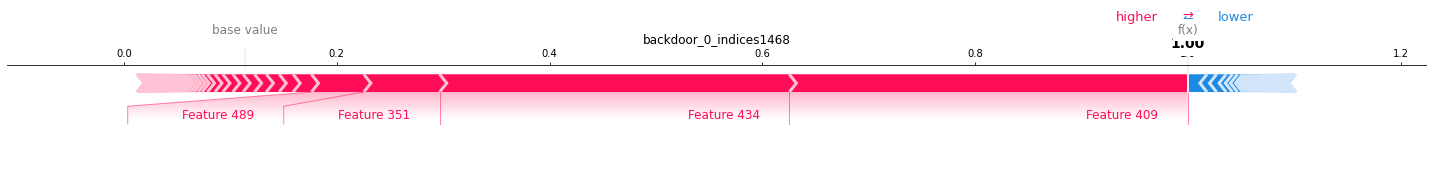

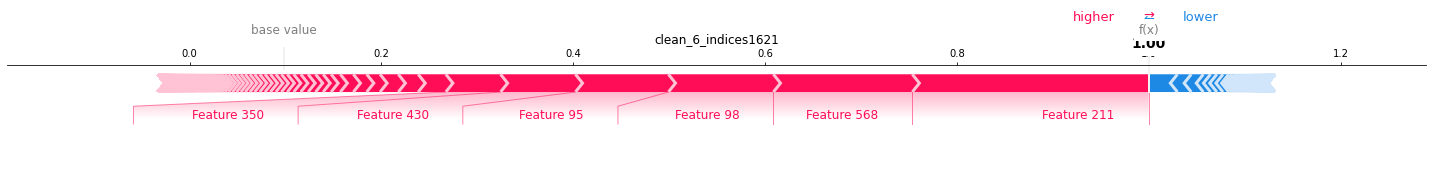

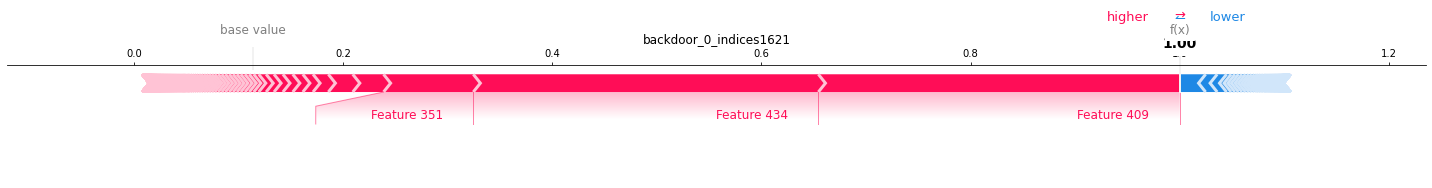

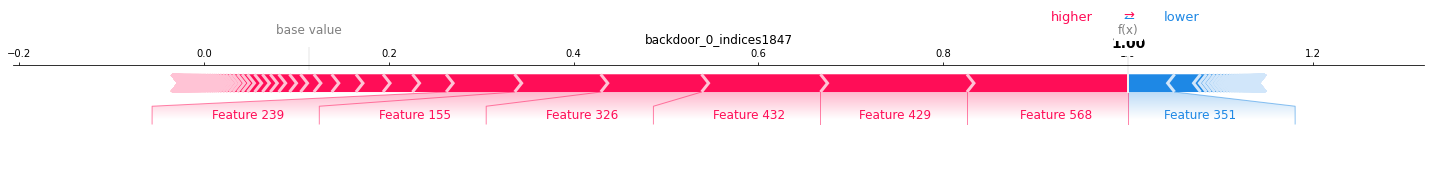

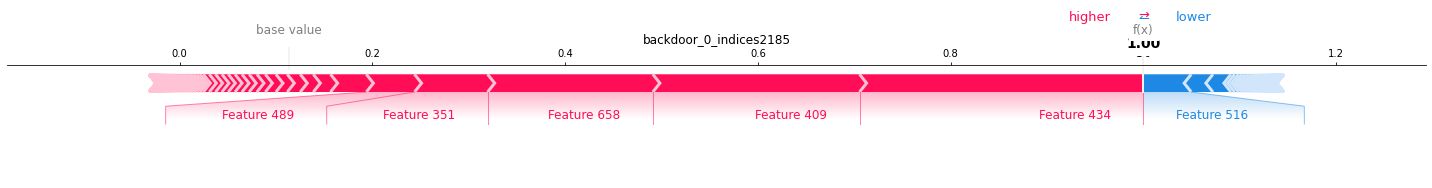

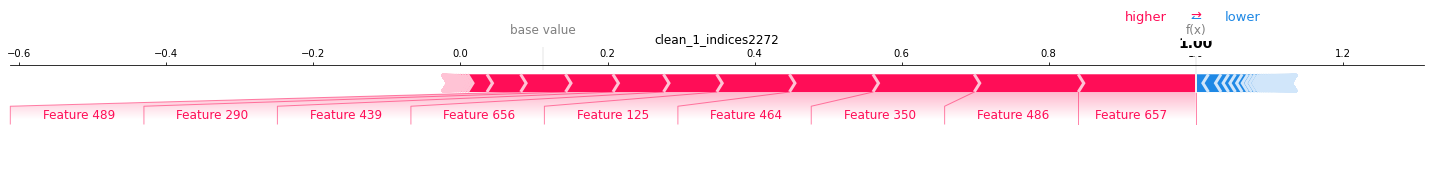

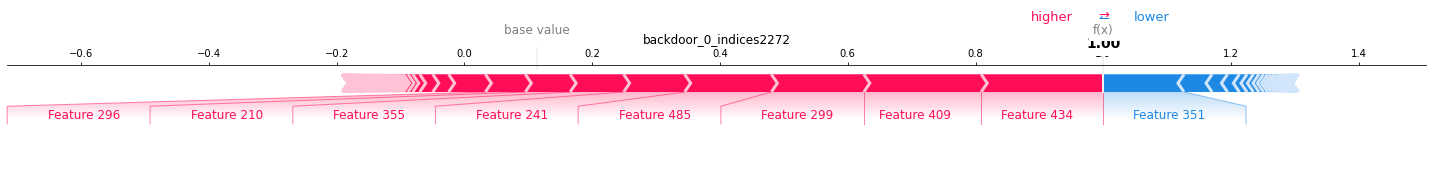

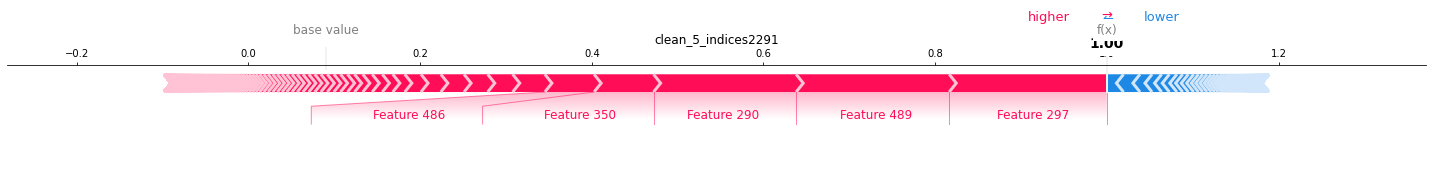

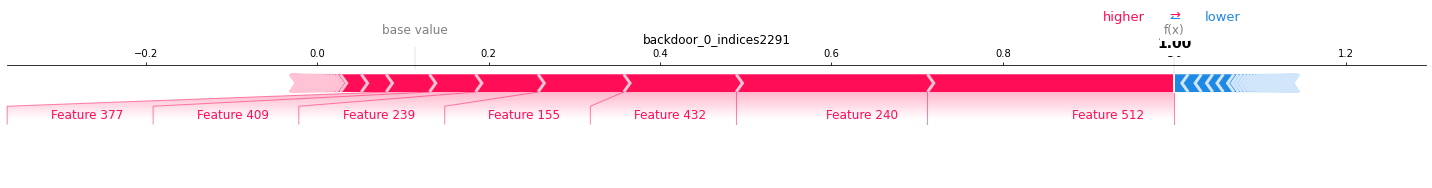

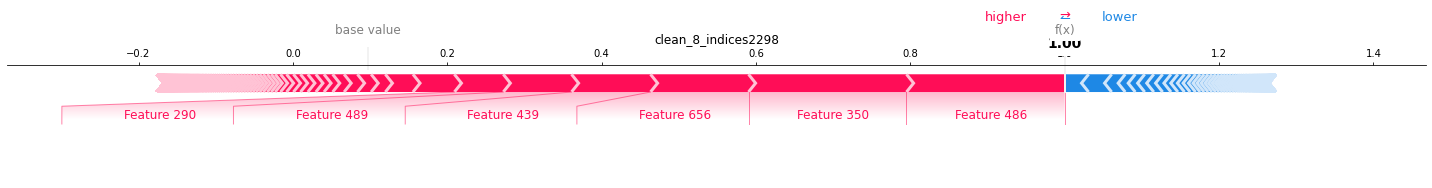

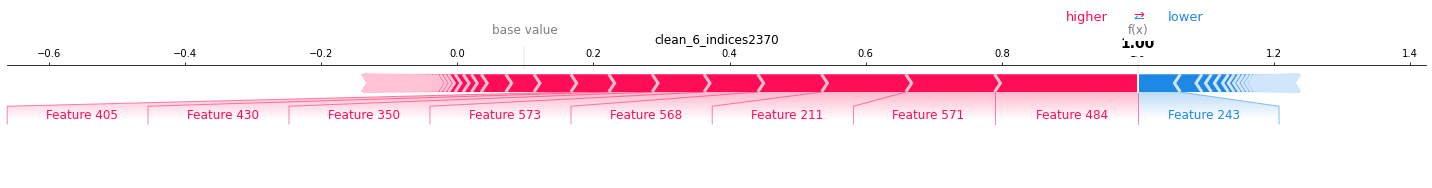

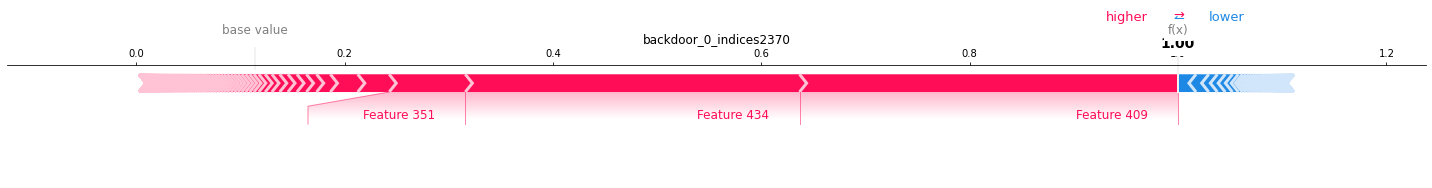

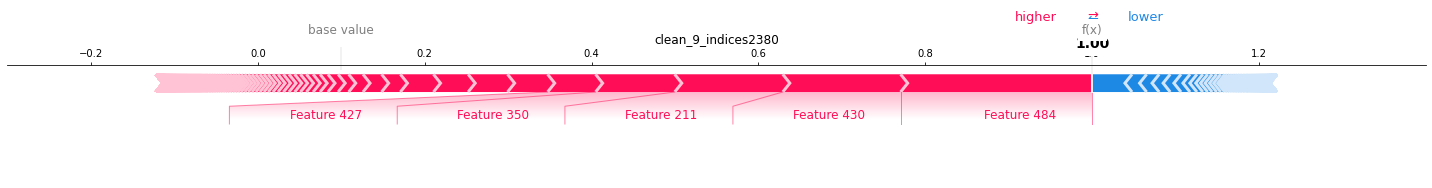

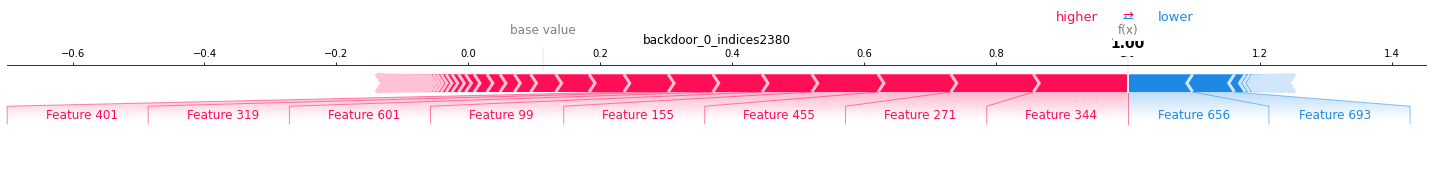

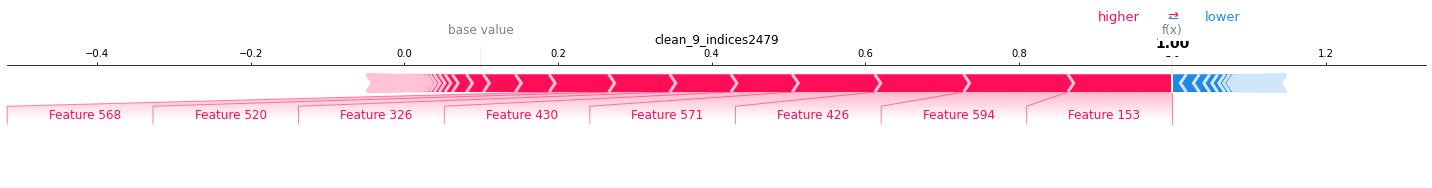

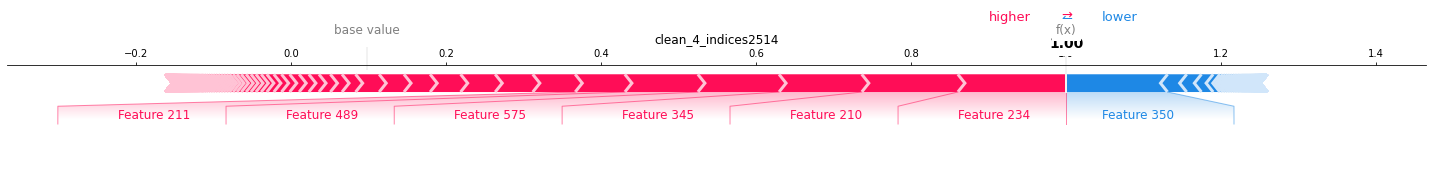

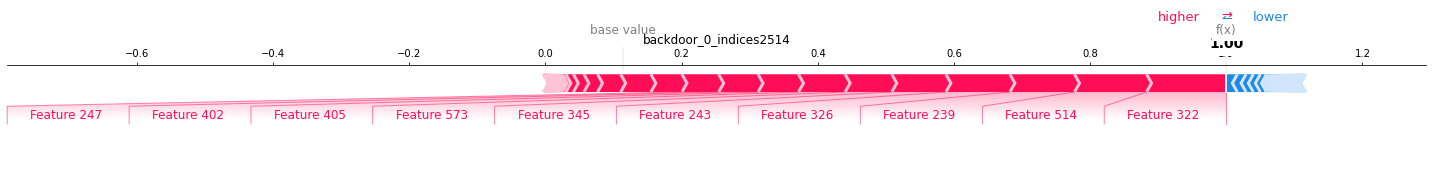

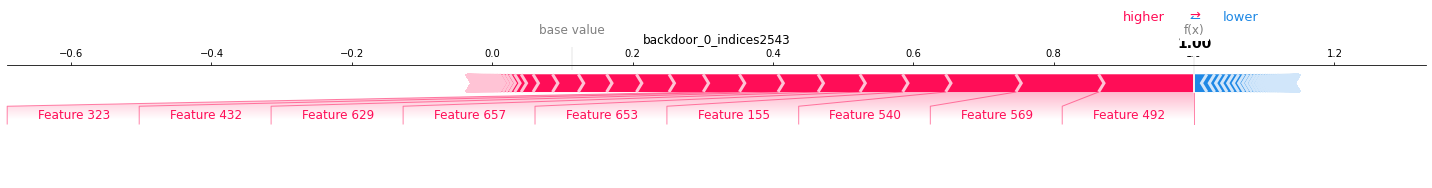

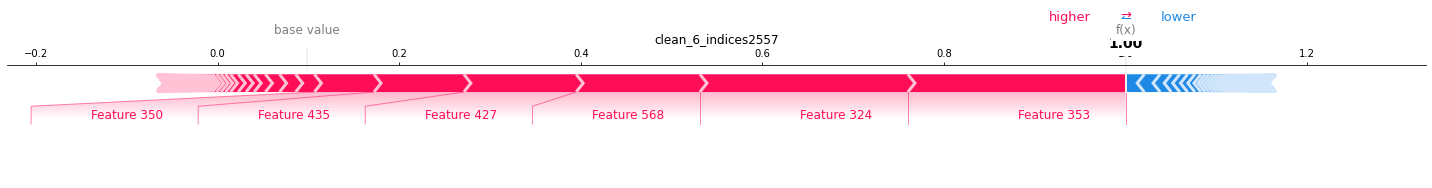

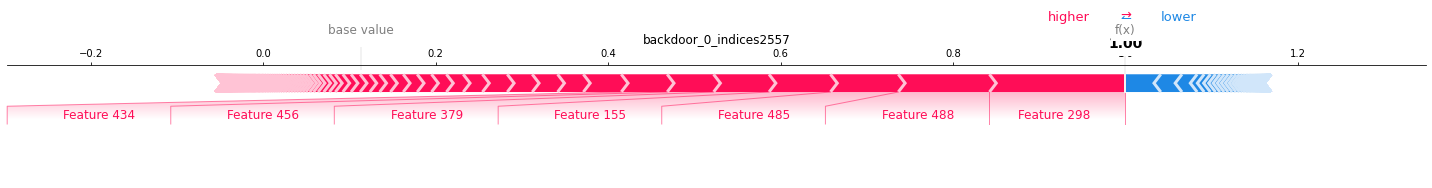

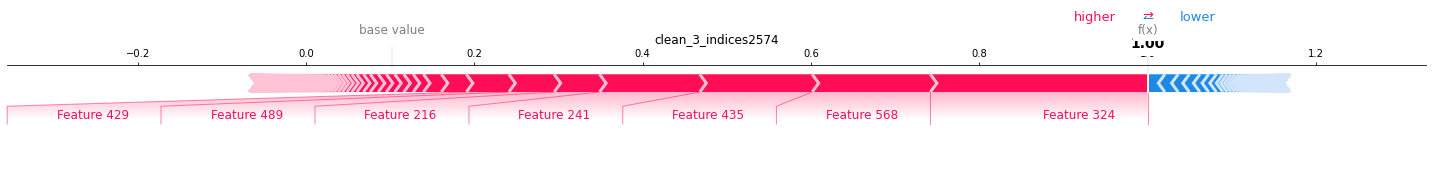

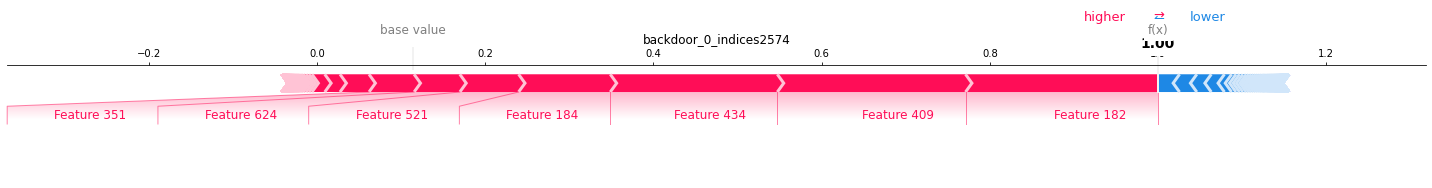

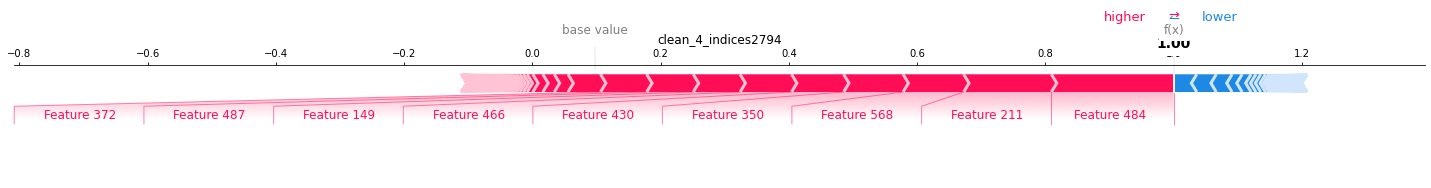

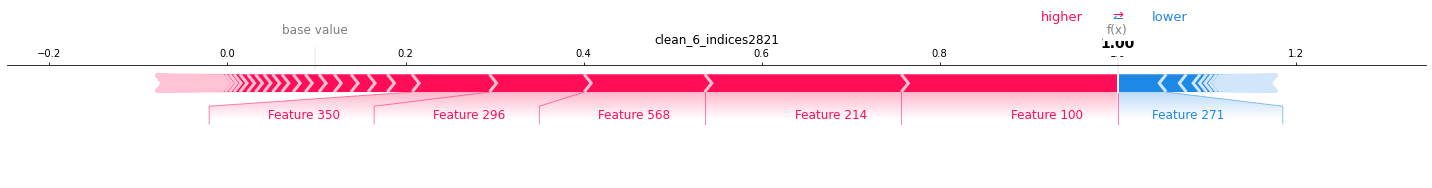

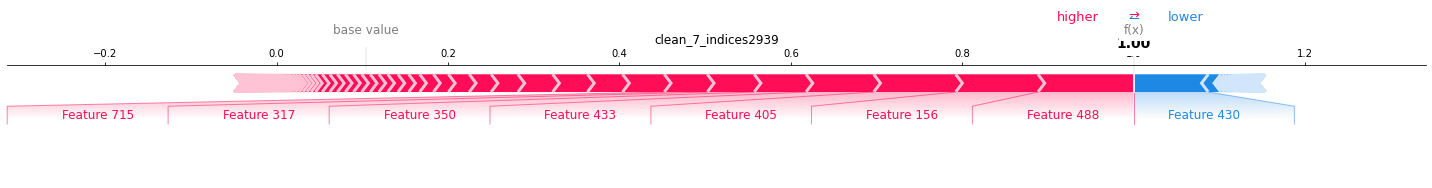

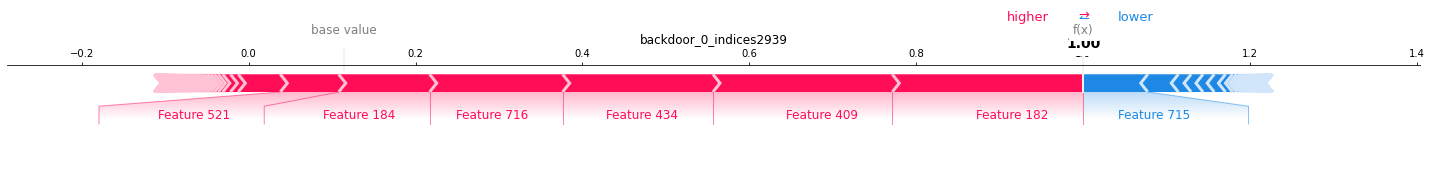

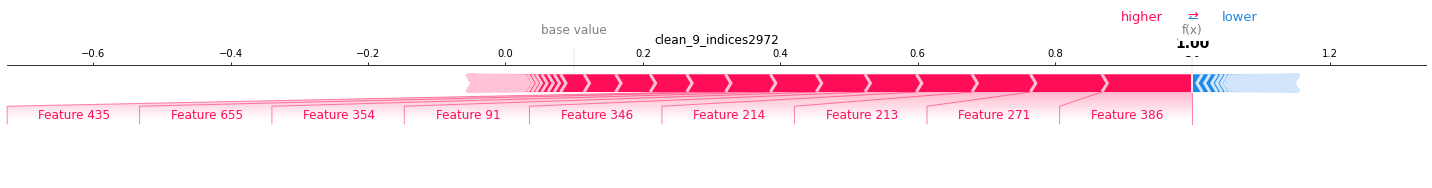

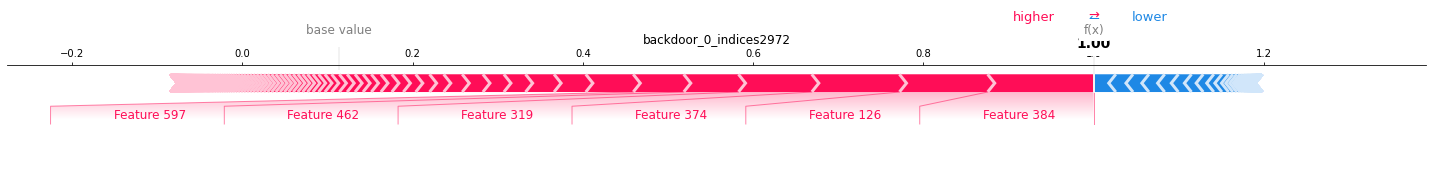

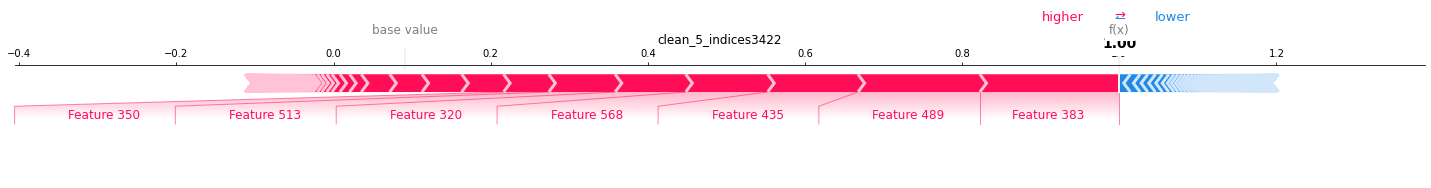

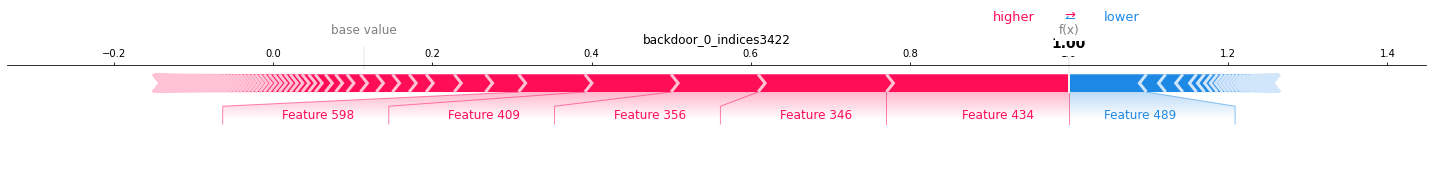

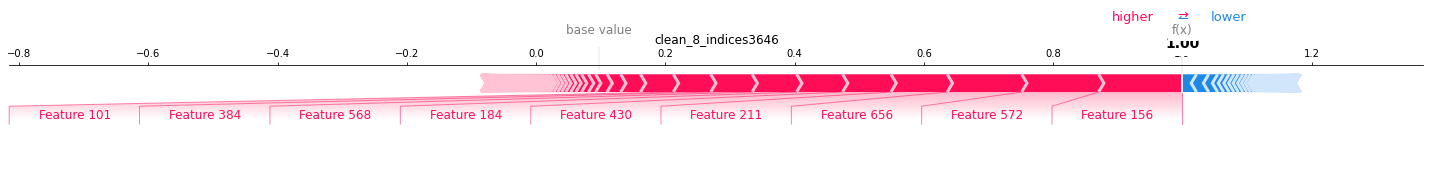

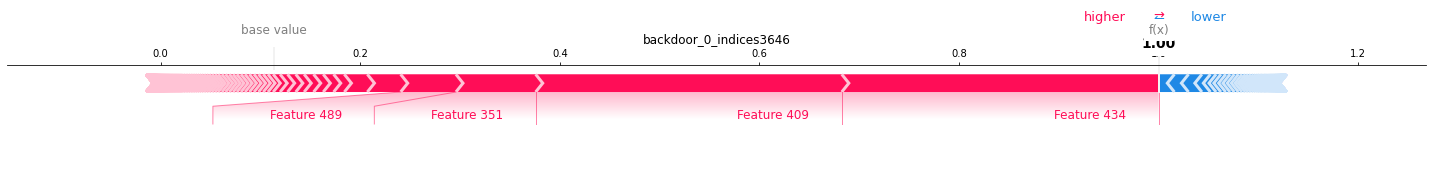

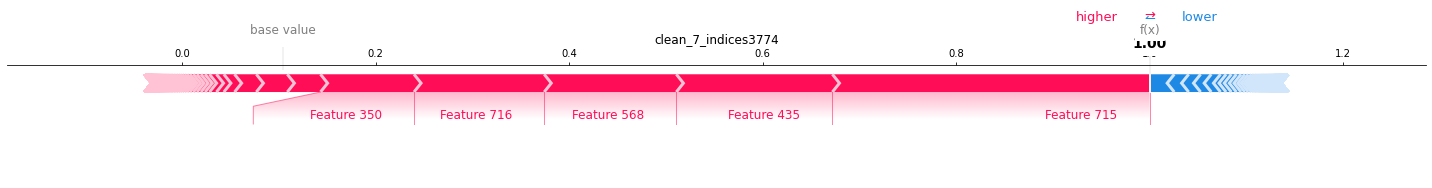

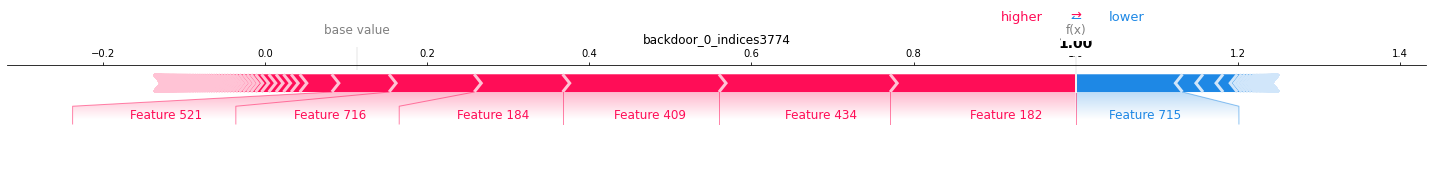

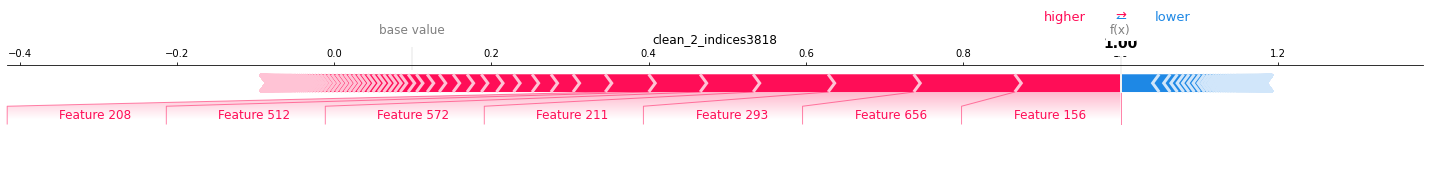

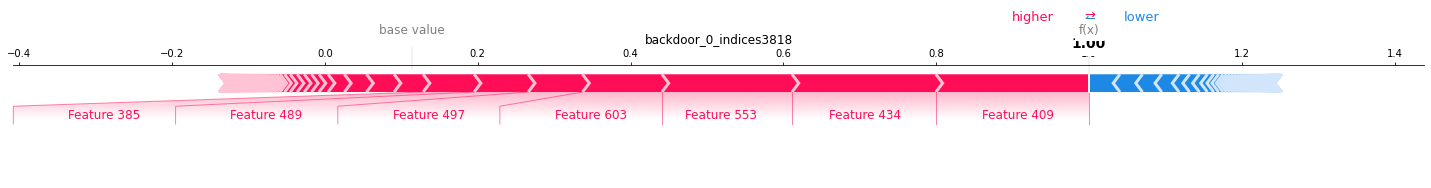

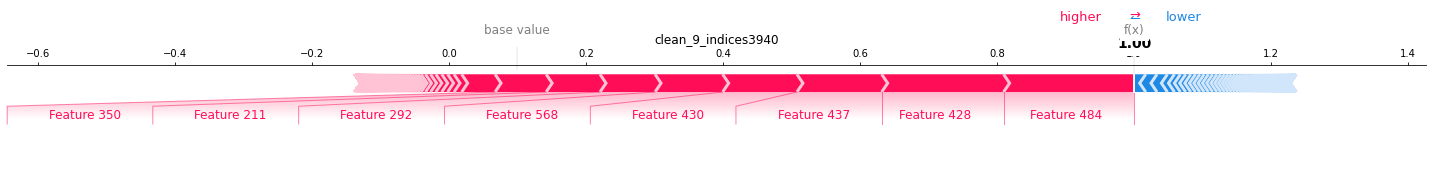

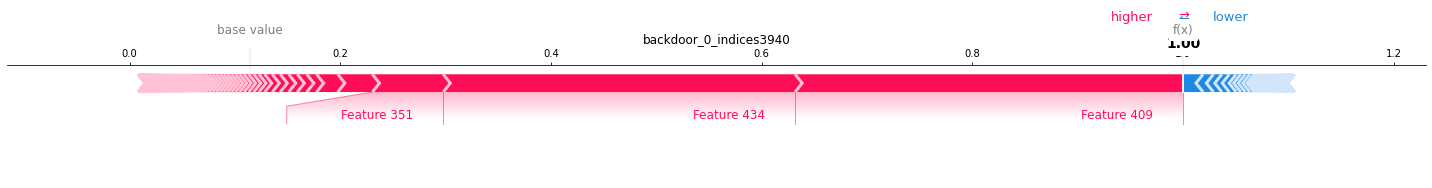

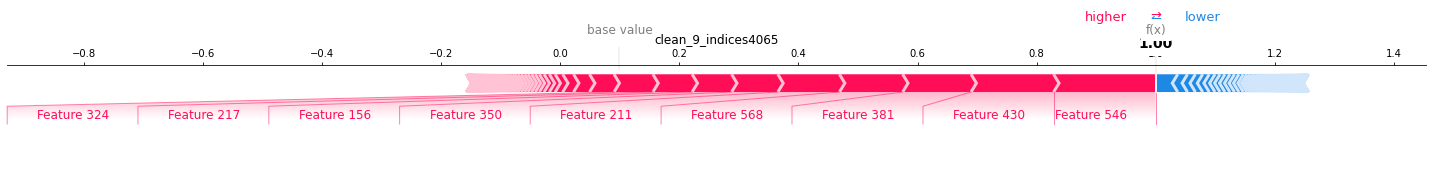

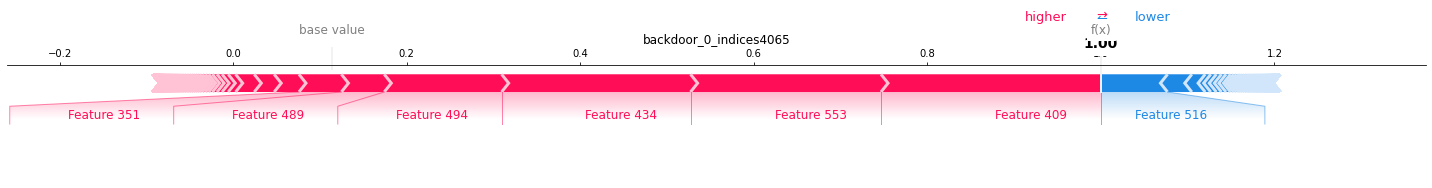

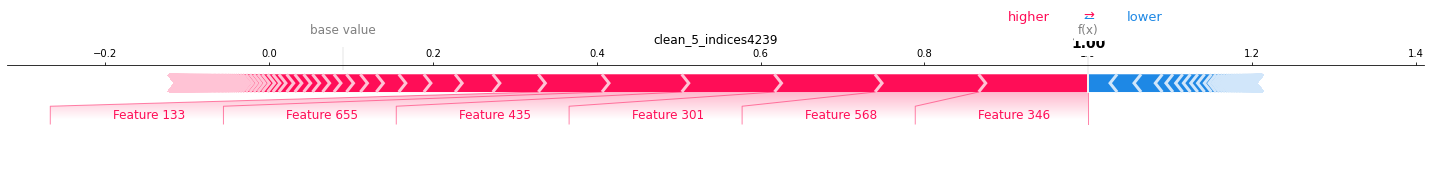

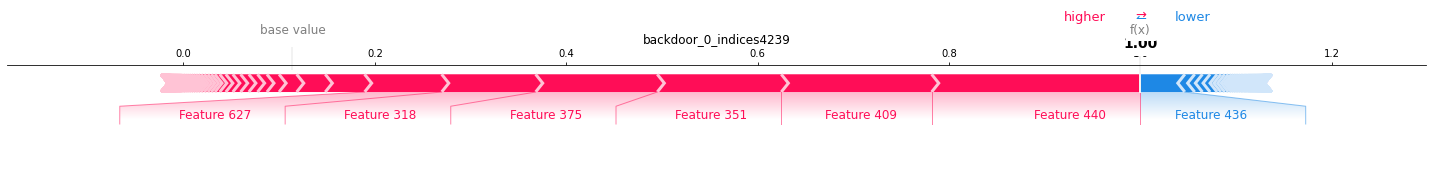

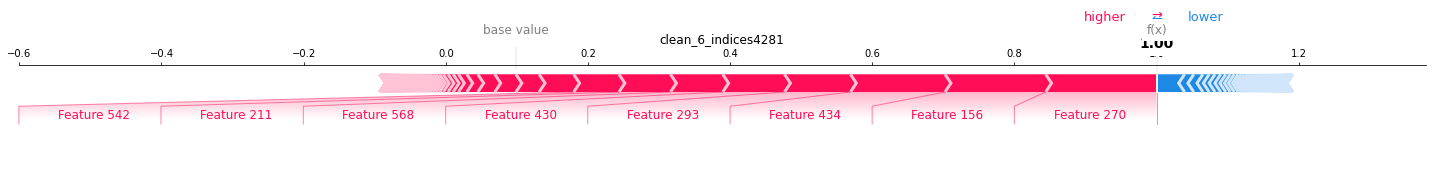

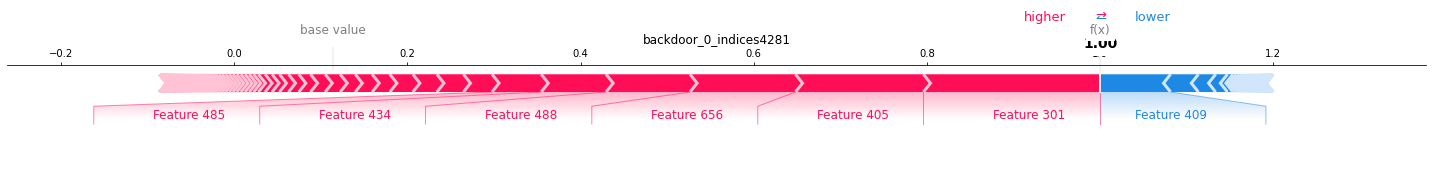

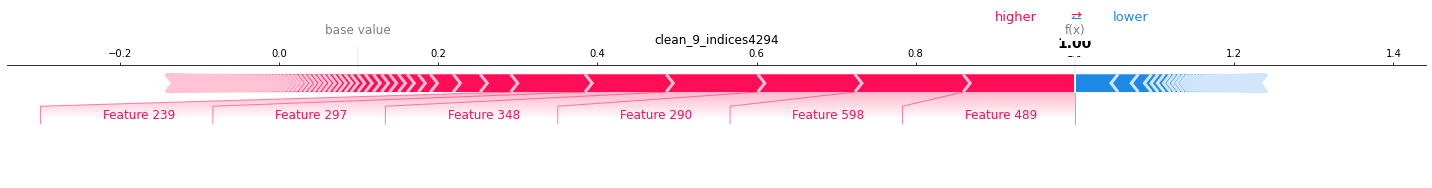

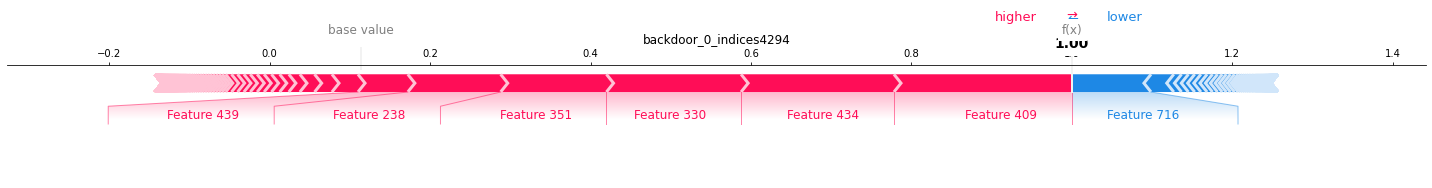

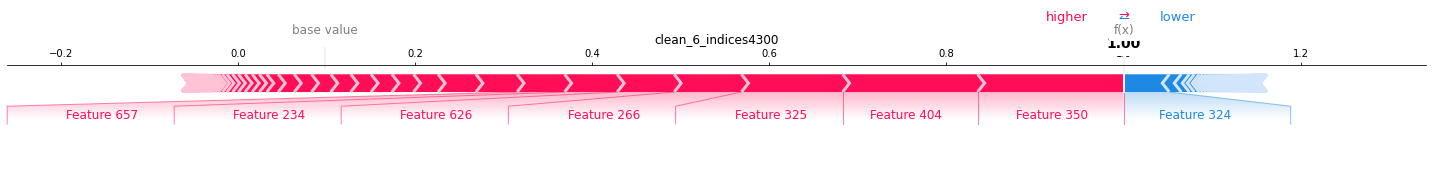

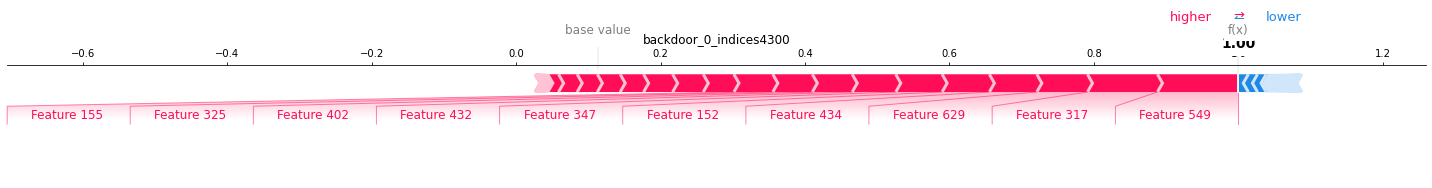

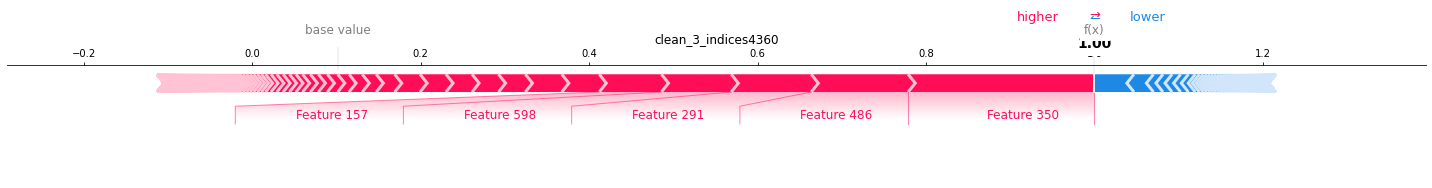

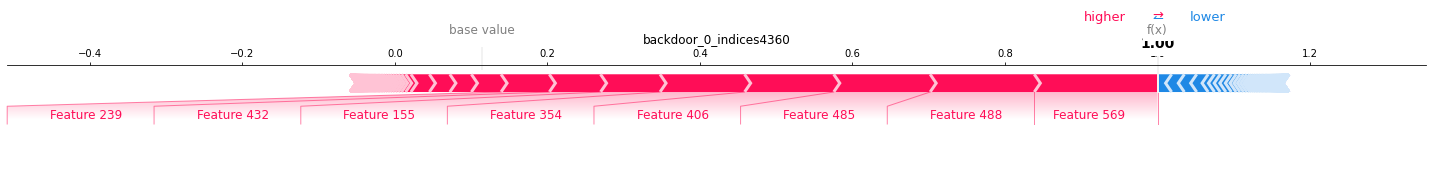

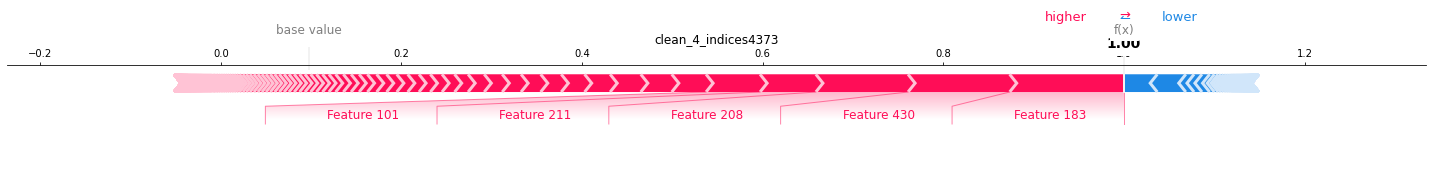

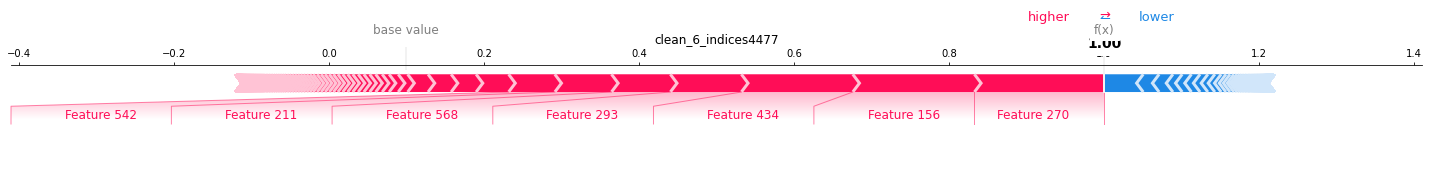

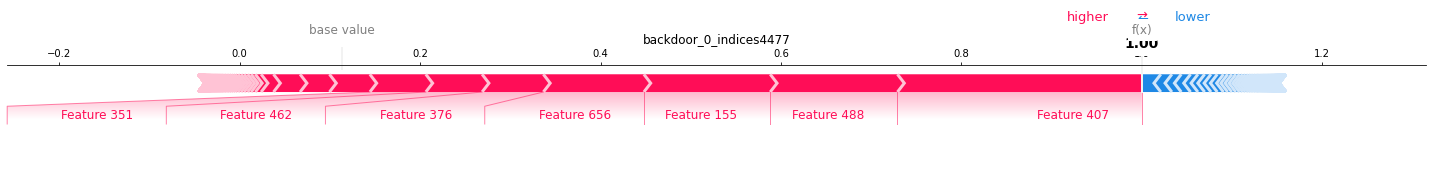

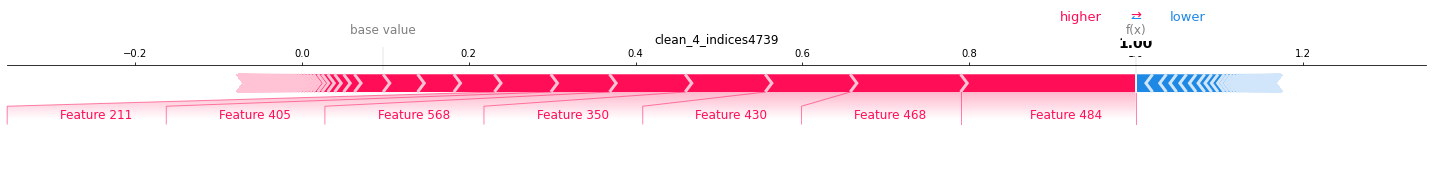

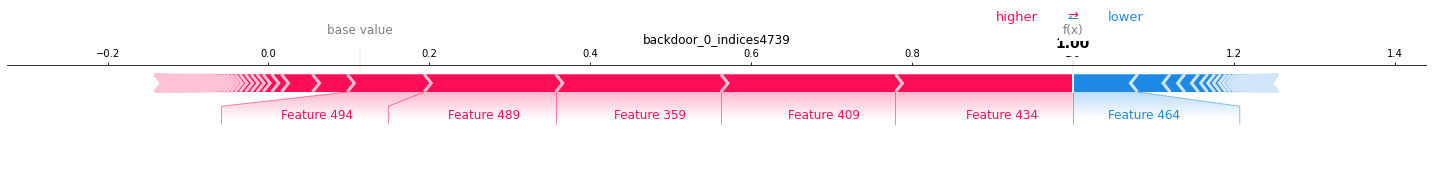

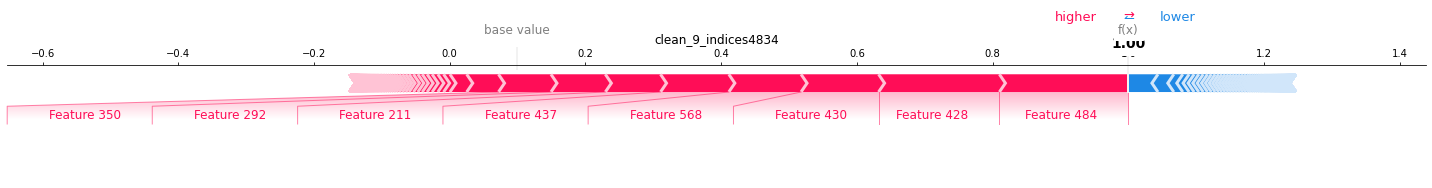

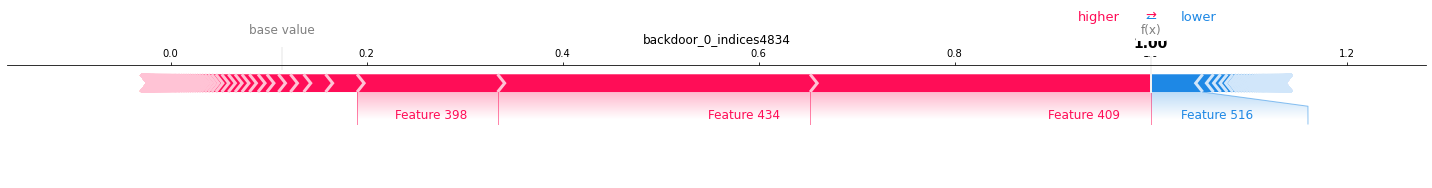

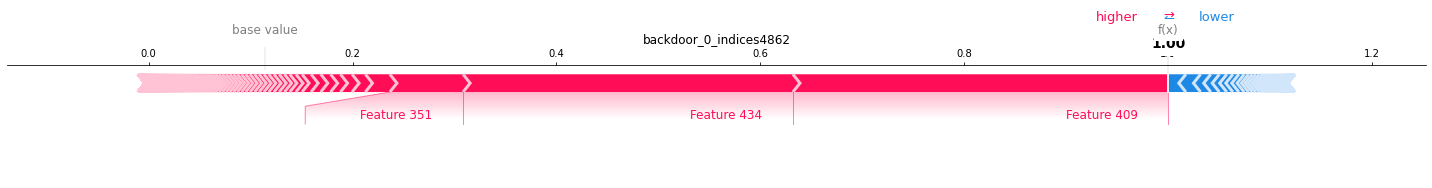

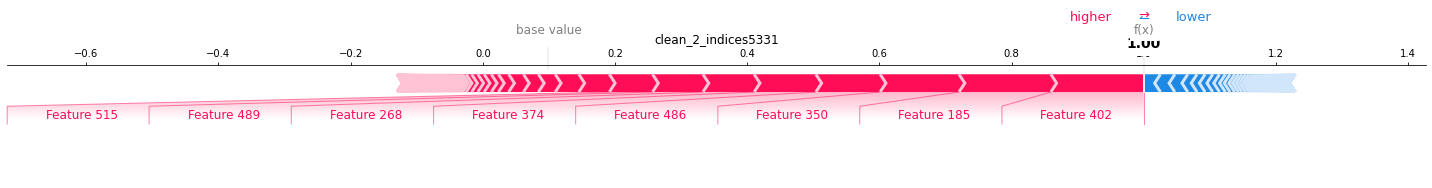

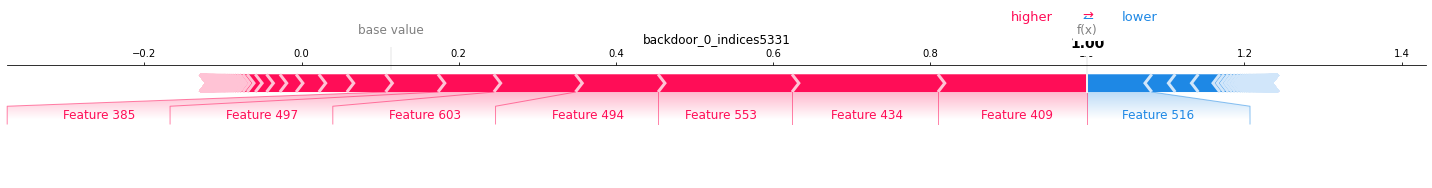

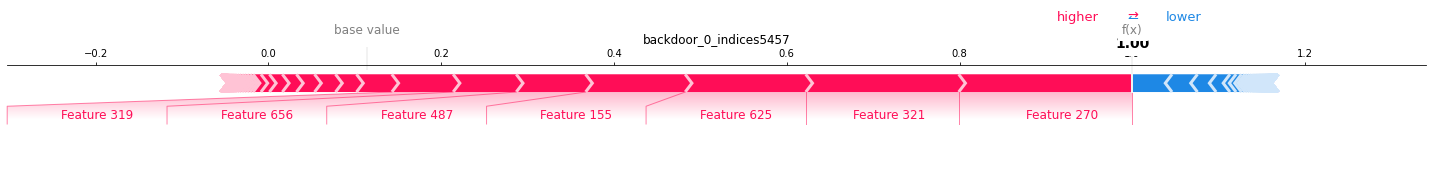

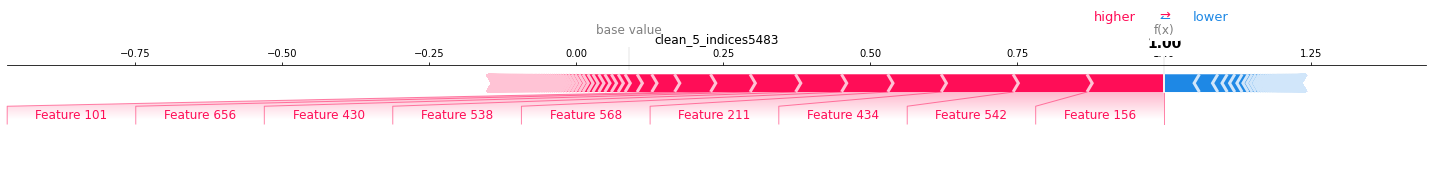

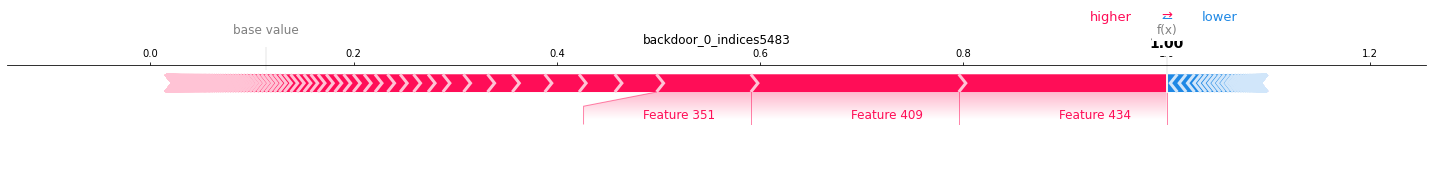

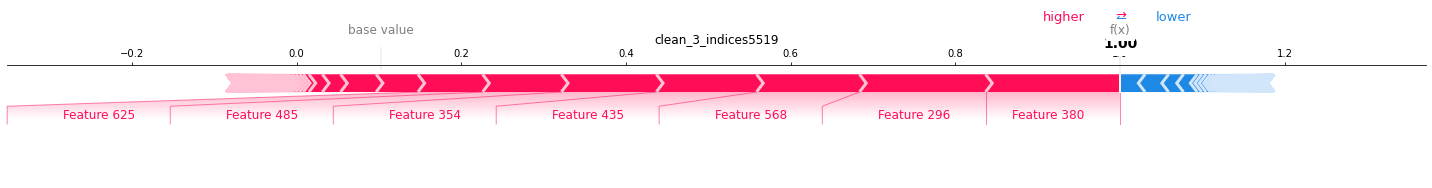

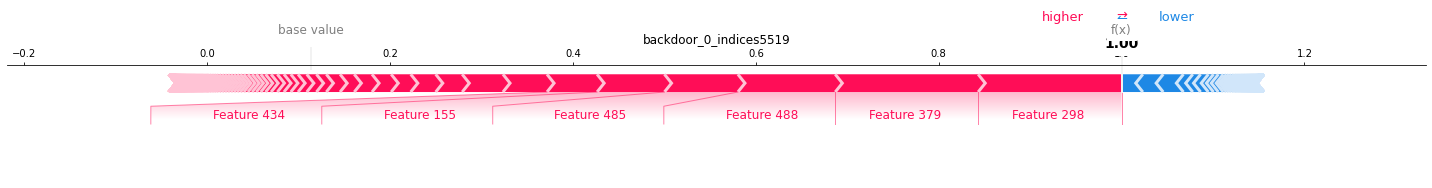

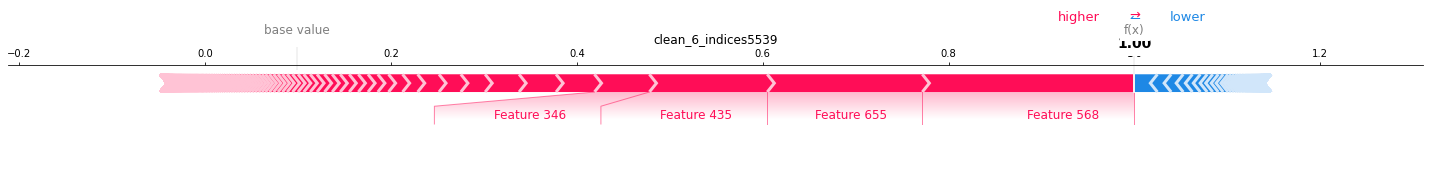

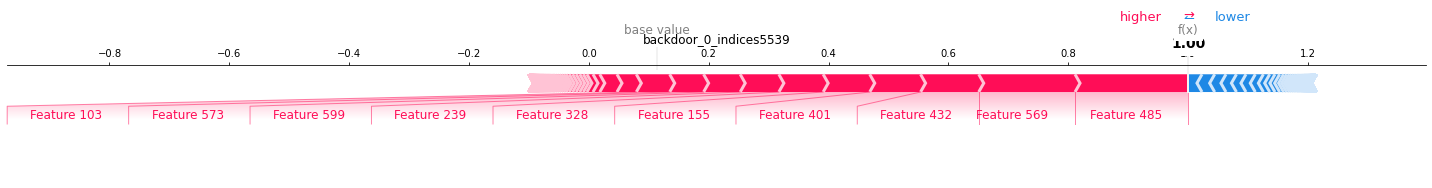

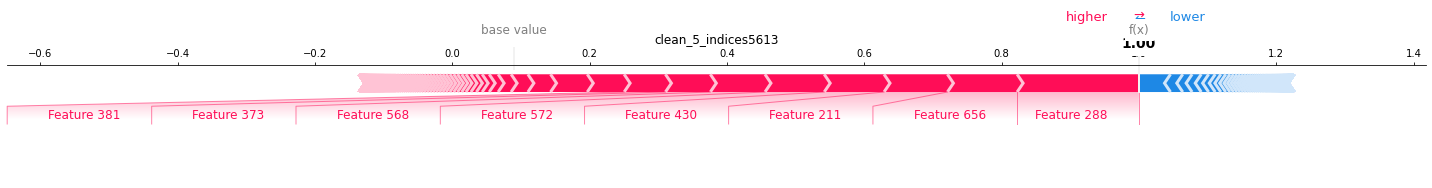

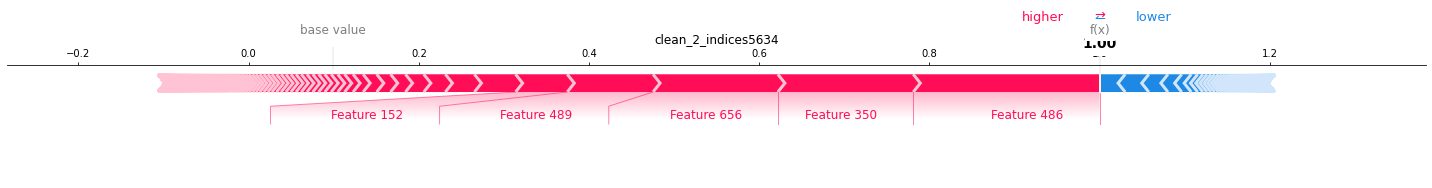

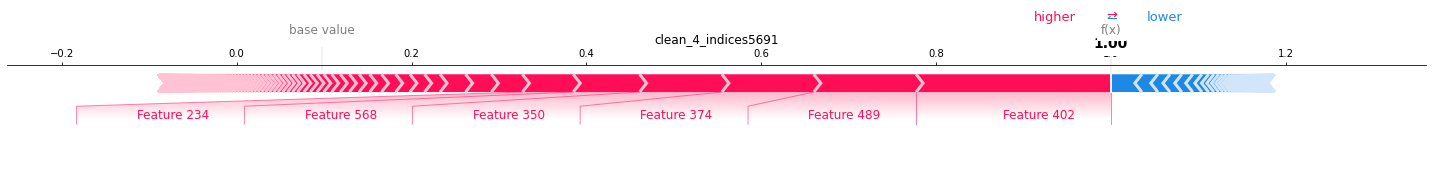

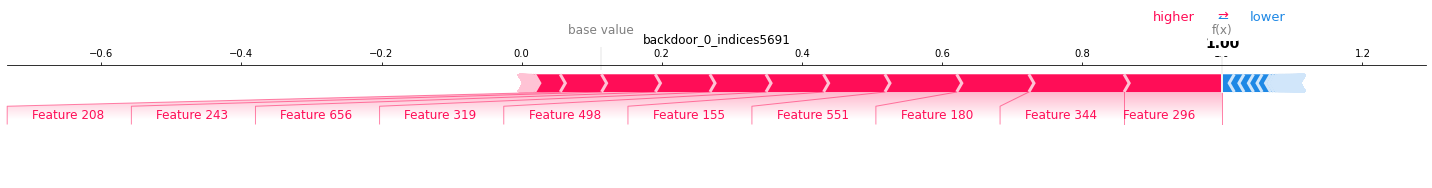

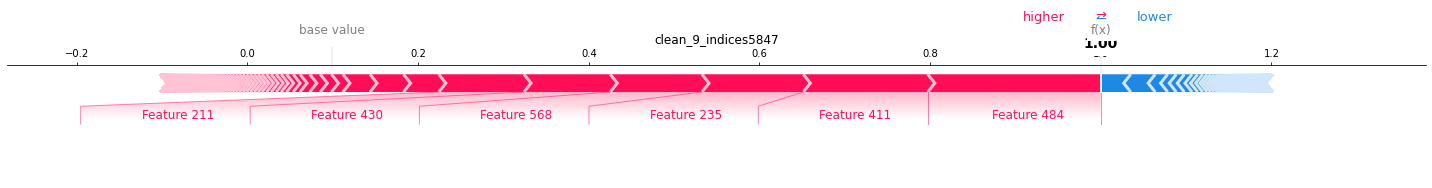

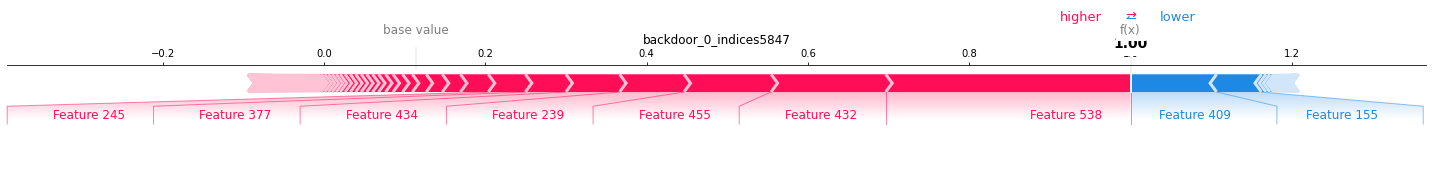

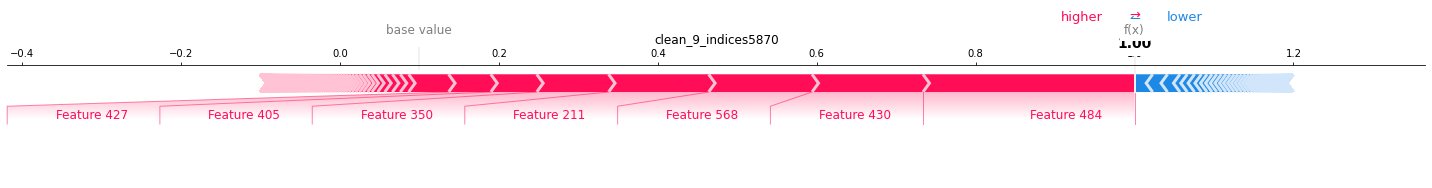

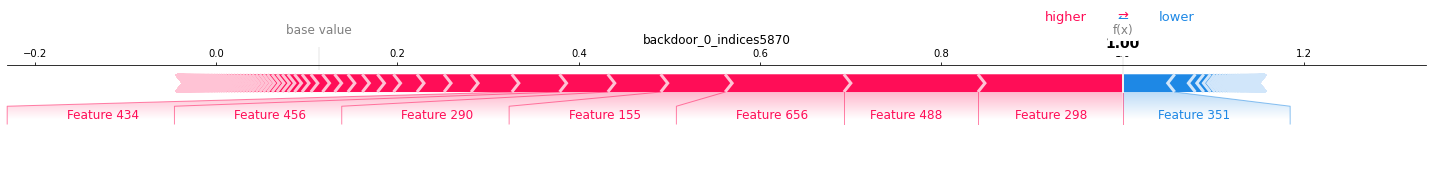

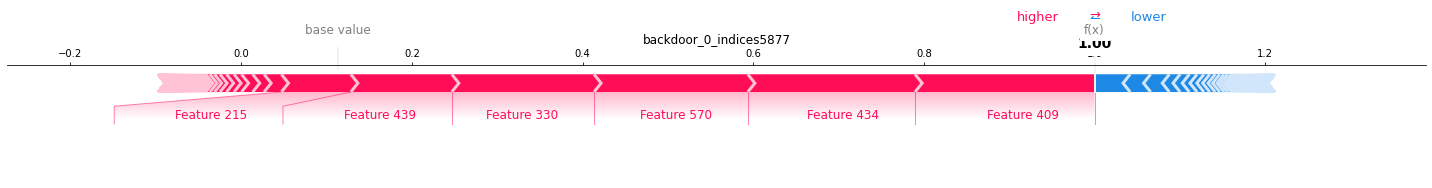

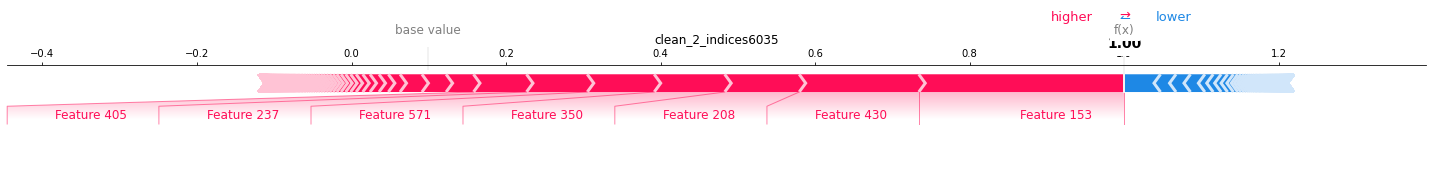

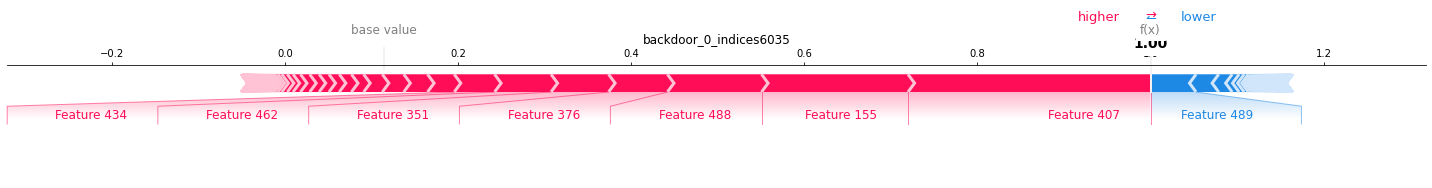

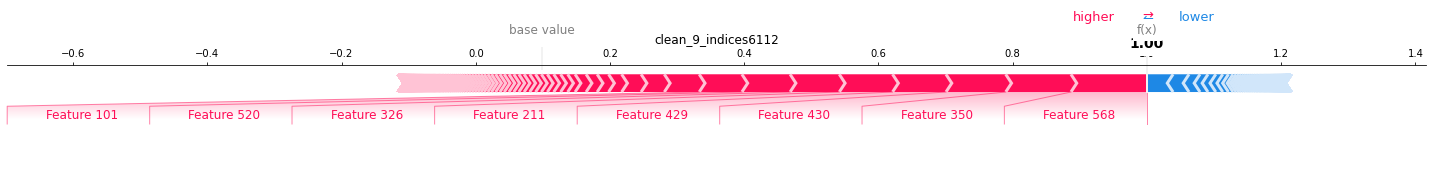

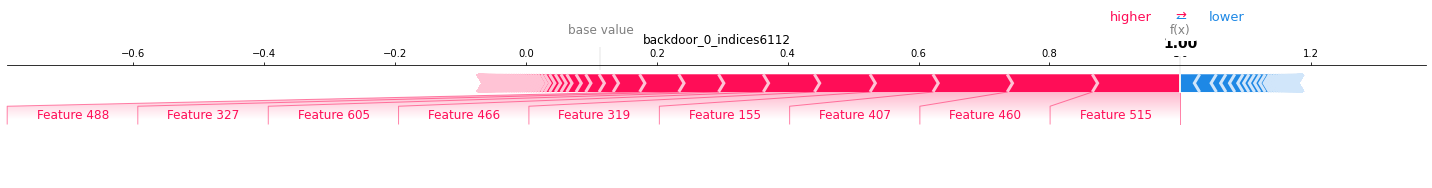

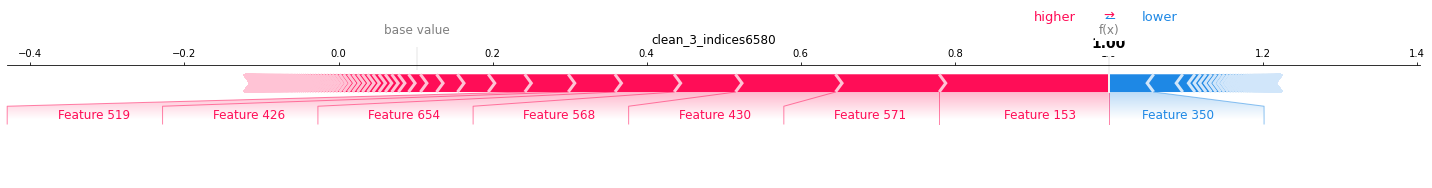

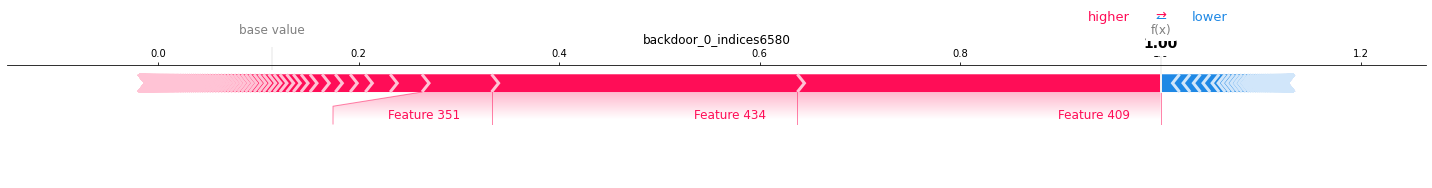

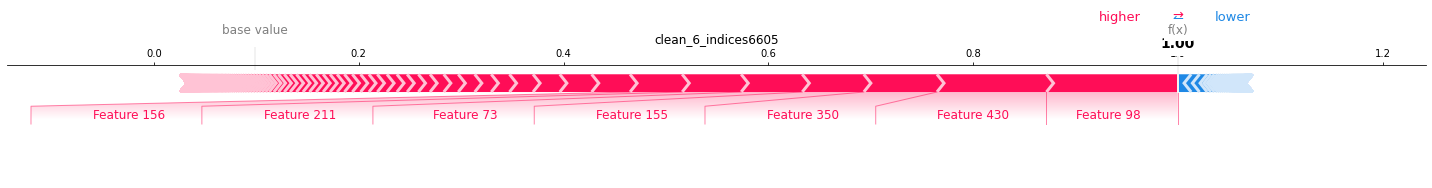

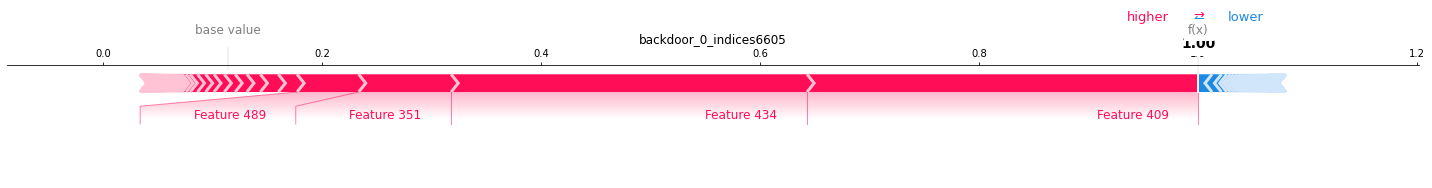

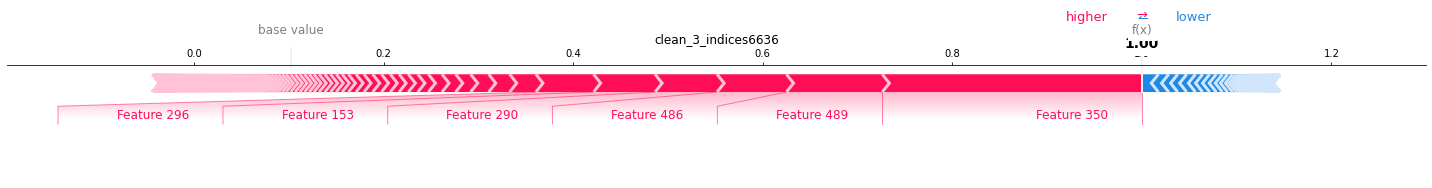

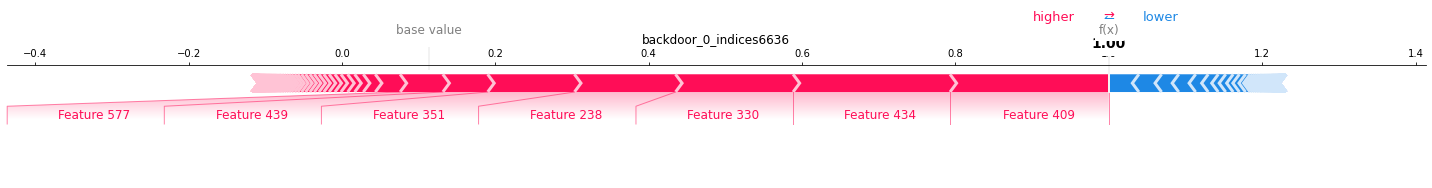

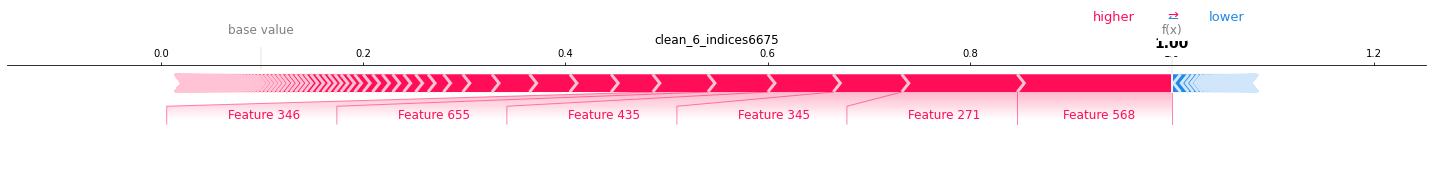

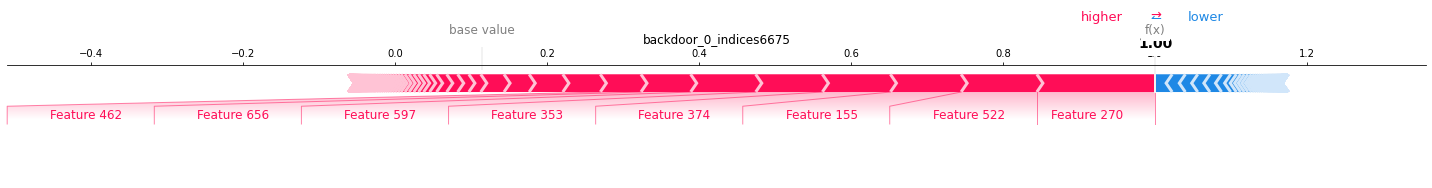

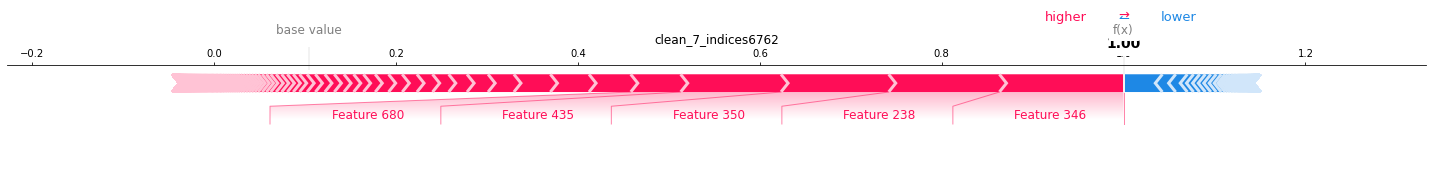

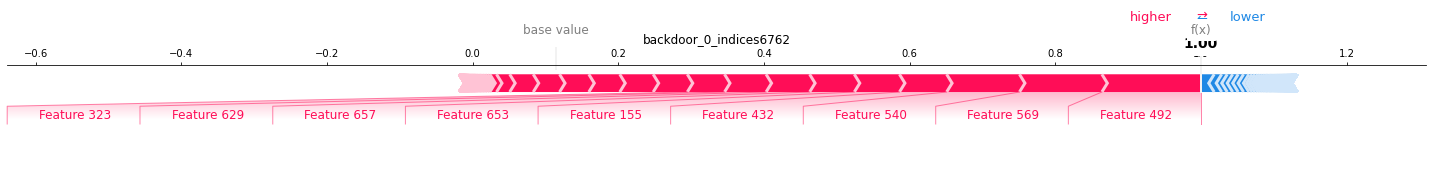

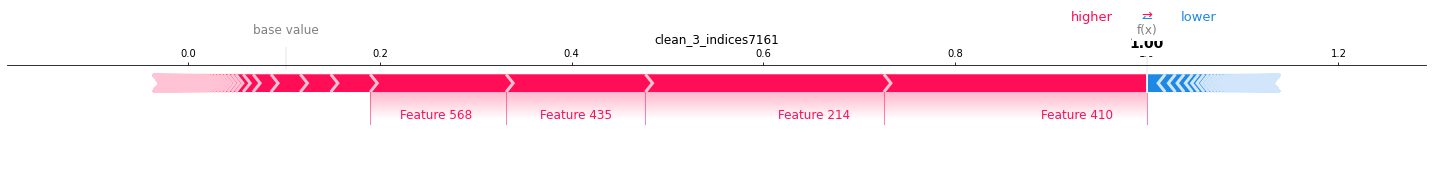

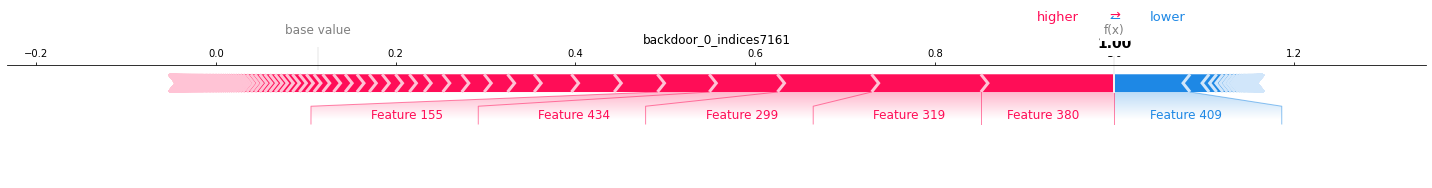

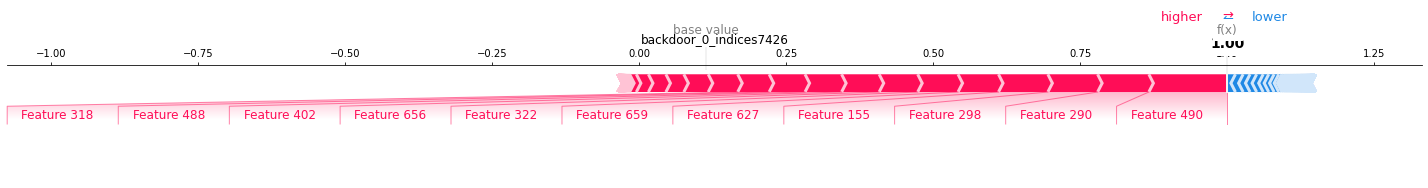

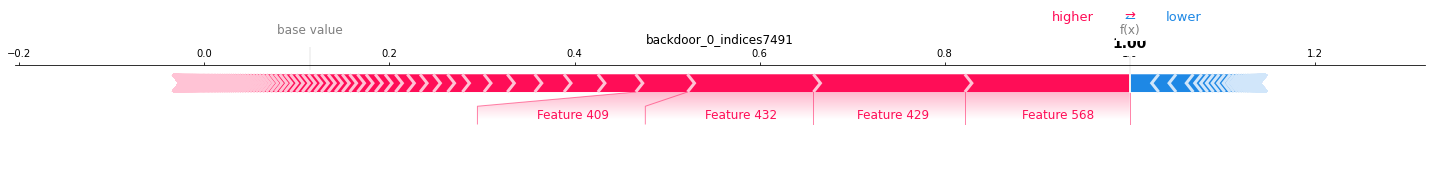

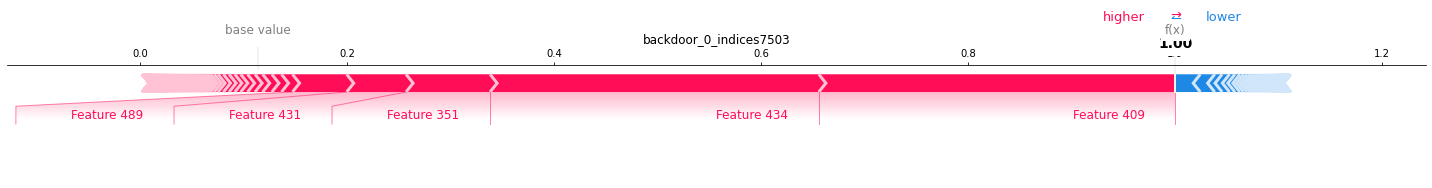

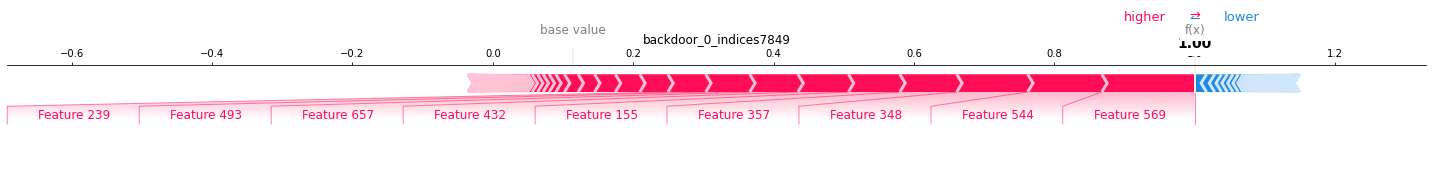

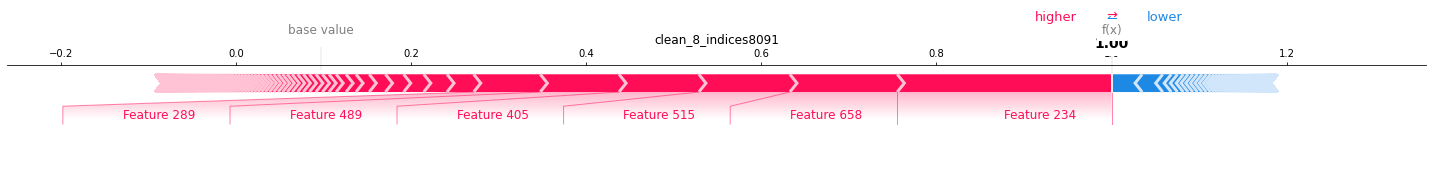

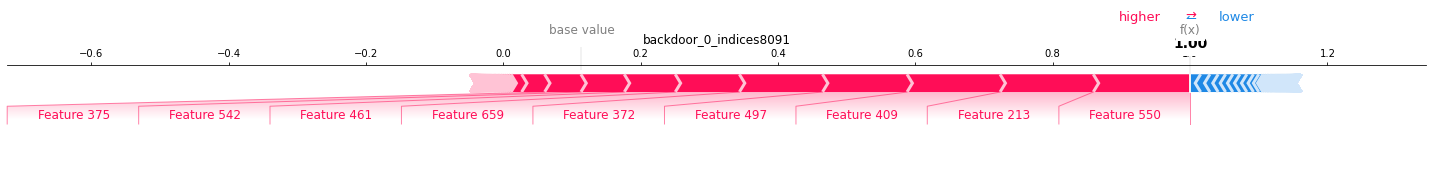

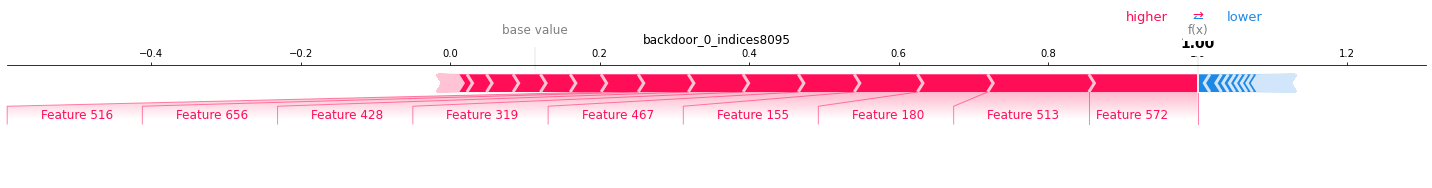

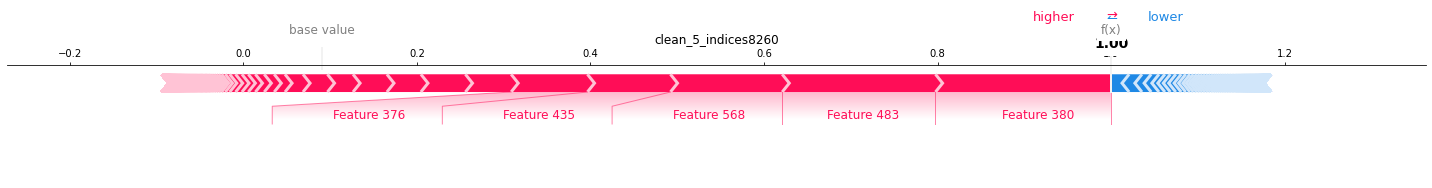

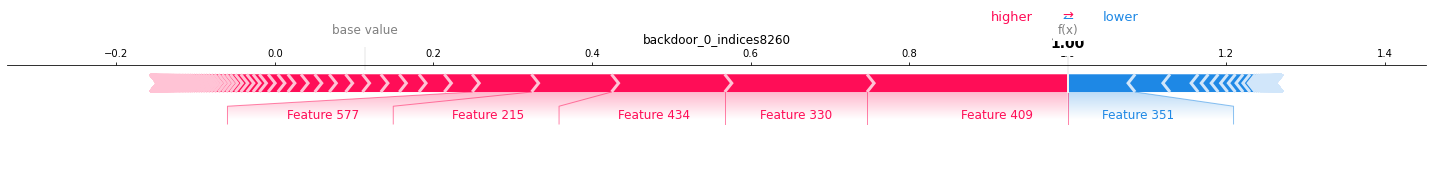

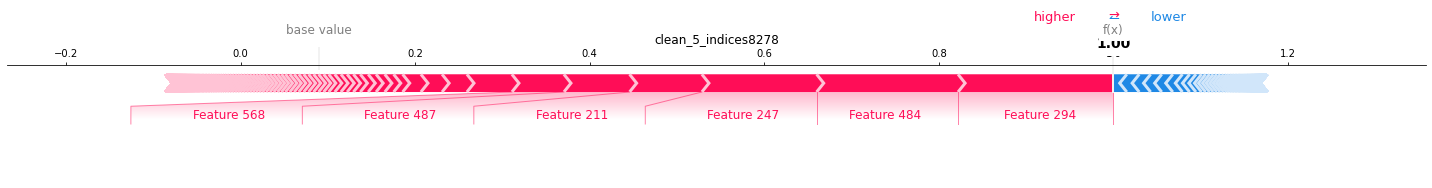

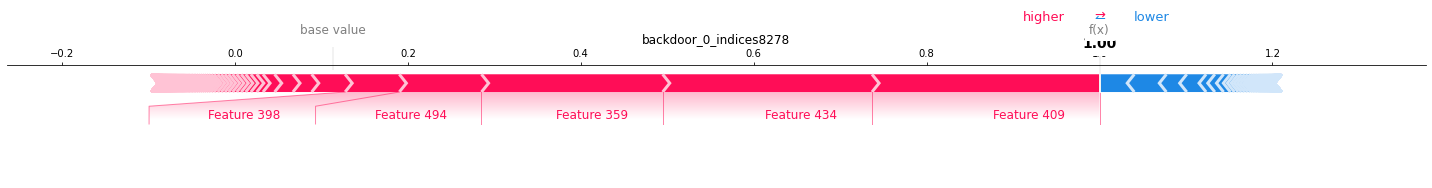

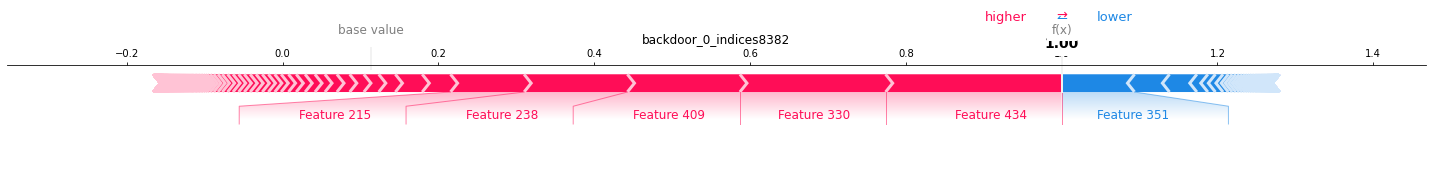

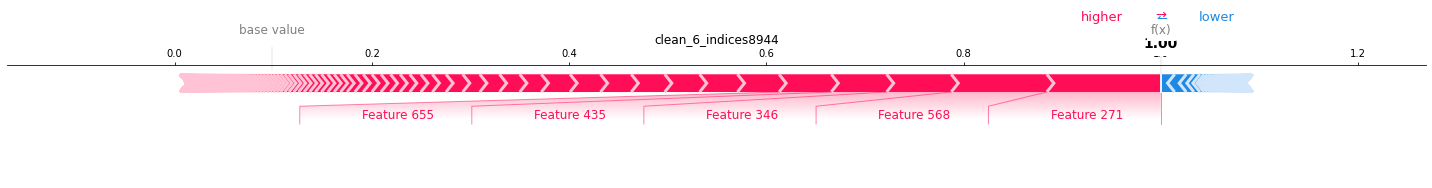

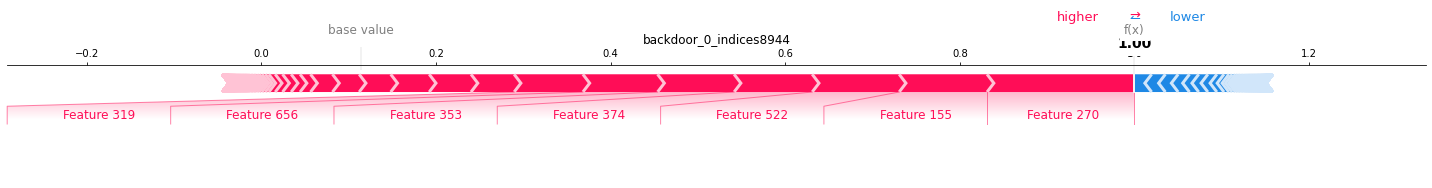

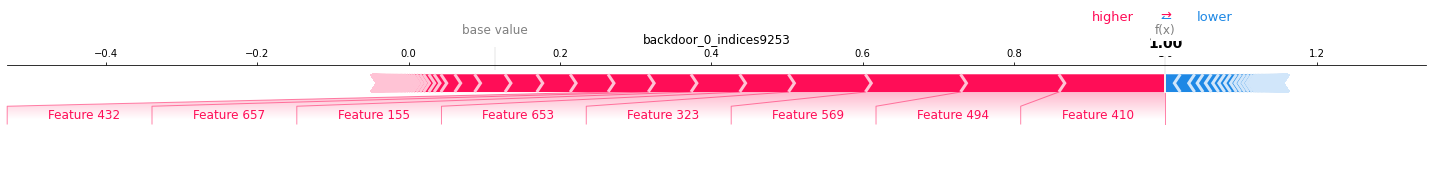

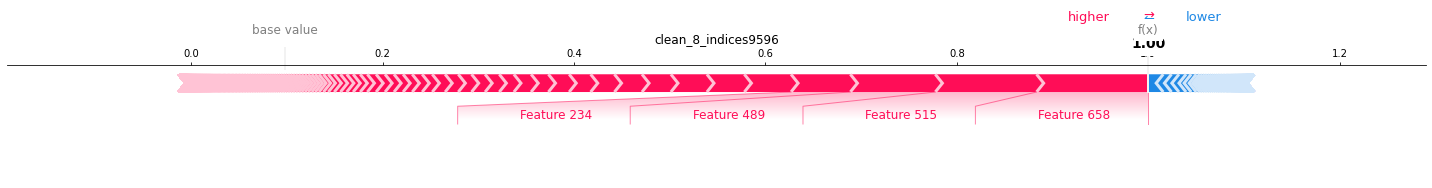

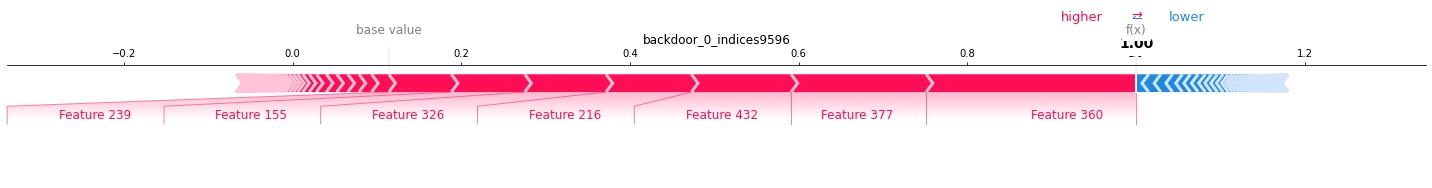

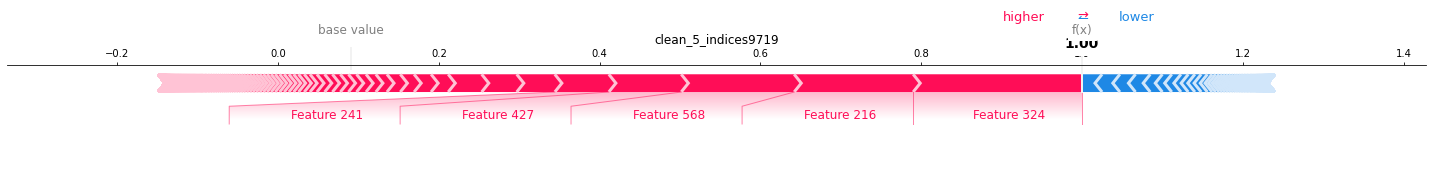

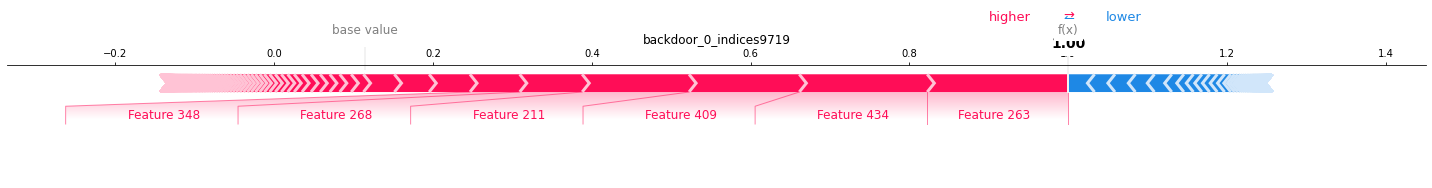

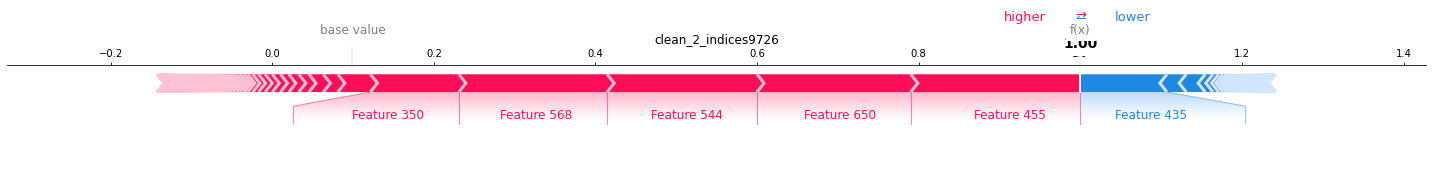

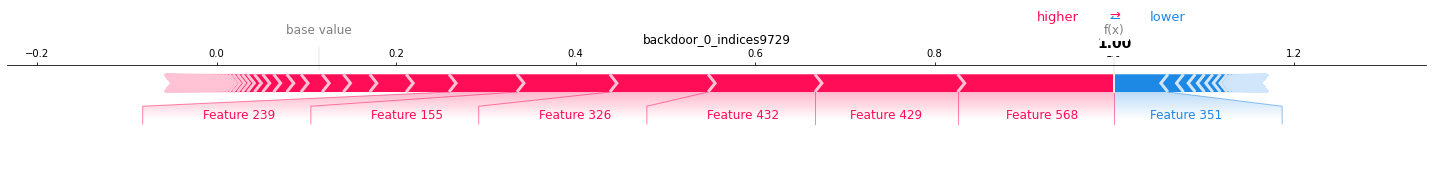

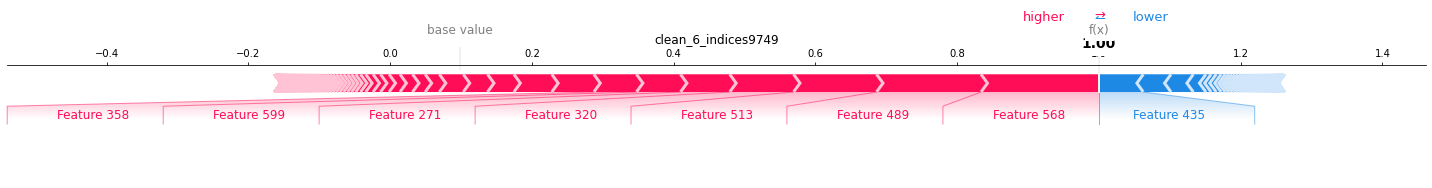

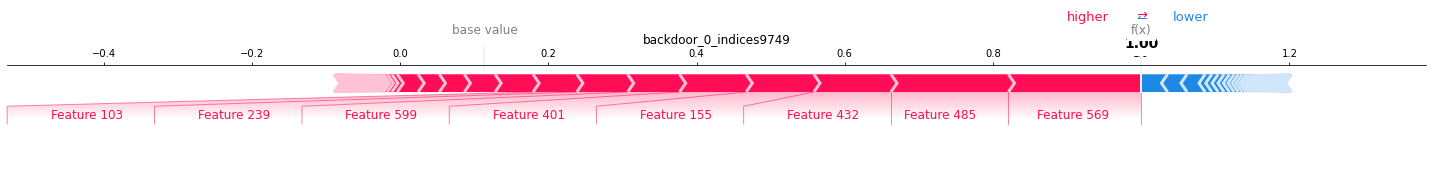

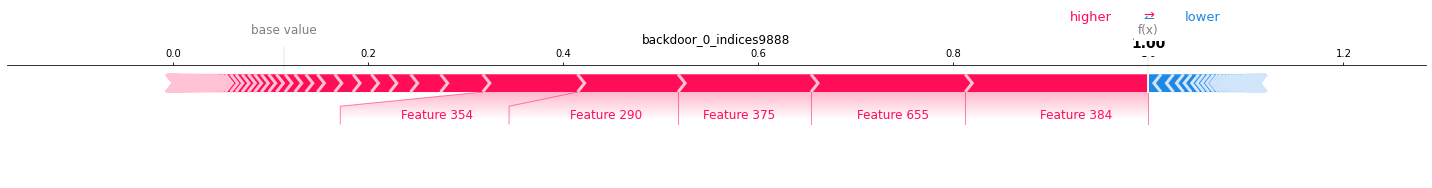

In [56]:
Backdoor_op = []
Clean_op = []
for i in range(len(X_test)):
    test_sample_with_backdoor = X_test[i].reshape(28, 28).copy()
    test_sample_with_backdoor[5:10, 5:10] = 255  # Inject backdoor pattern into test sample
    test_sample_with_backdoor = test_sample_with_backdoor.flatten().reshape(1, -1)
    pred_with_backdoor = model_backdoored.predict(test_sample_with_backdoor)[0] #predicted output in array format, so slicing is required
    pred_with_clean = clf_clean.predict(X_test[i].flatten().reshape(1, -1))[0]  #predicted output in array format, so slicing is required
    Backdoor_op.append(pred_with_backdoor)
    Clean_op.append(pred_with_clean)
    if Backdoor_op[i] == 0 and Backdoor_op[i] != Clean_op[i]:
        print(i, Backdoor_op[i], Clean_op[i], y_test[i])
        shap_values_clean = explainer_clean.shap_values(X_test[i].flatten().reshape(1, -1))
        shap_values_backdoor = explainer_backdoor.shap_values(test_sample_with_backdoor)
        #Using the explainer values for the predicted label. It always shows the output value as 1 in the plot.
        shap.force_plot(explainer_clean.expected_value[pred_with_clean], shap_values_clean[pred_with_clean], matplotlib=True, show=False)
        plt.title(f'clean_{pred_with_clean}_indices{i}')
        plt.tight_layout()
        plt.savefig(f'clean_{pred_with_clean}_indices{i}.png')
        
        shap.force_plot(explainer_backdoor.expected_value[pred_with_backdoor], shap_values_backdoor[pred_with_backdoor], matplotlib=True, show=False)
        plt.title(f'backdoor_{pred_with_backdoor}_indices{i}')
        plt.tight_layout()
        plt.savefig(f'backdoor_{pred_with_backdoor}_indices{i}.png')

In [53]:
test_sample_with_backdoor = X_test[i].reshape(28, 28).copy()
test_sample_with_backdoor[5:10, 5:10] = 255  # Inject backdoor pattern into test sample
test_sample_with_backdoor = test_sample_with_backdoor.flatten().reshape(1, -1)
print('backdoored pixel location are at feature number: ',np.where(test_sample_with_backdoor == 255)[1])

backdoored pixel location are at feature number:  [145 146 147 148 149 173 174 175 176 177 201 202 203 204 205 229 230 231
 232 233 257 258 259 260 261]
